Langzhou map

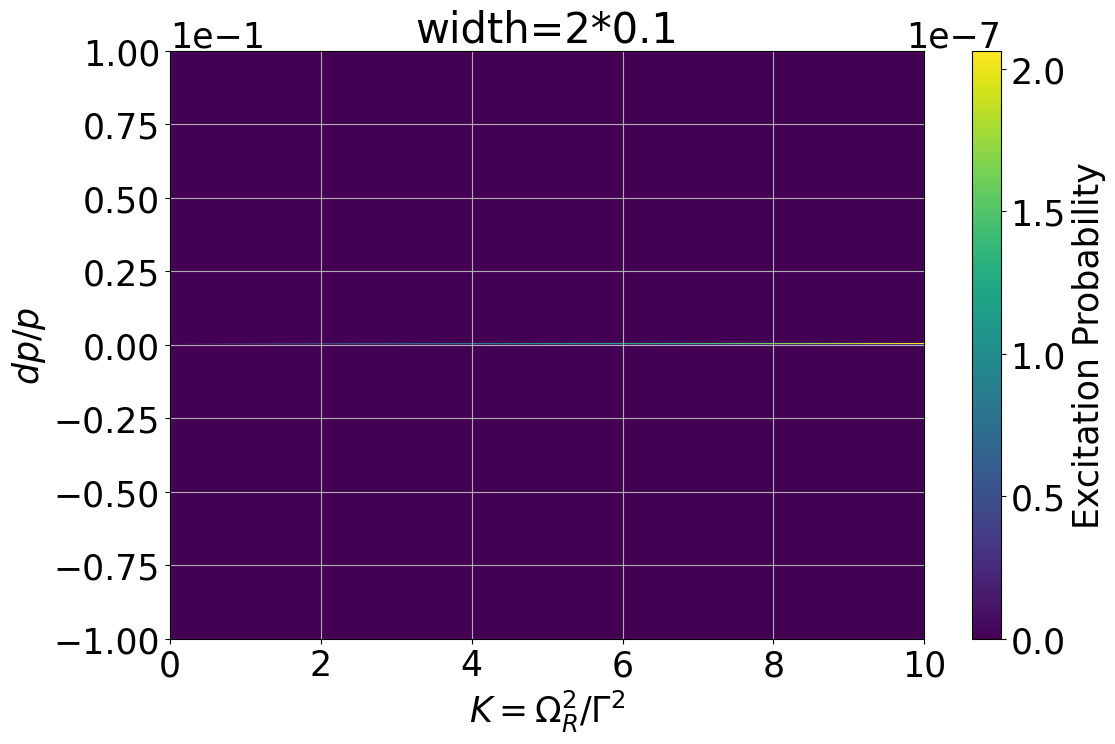

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import constants 

C_LIGHT = 2.99792458e8
hbar = 1.054571817e-34#; // J*sec
QELEM = 1.60217663e-19

#plot with dp/p instead of detuning

ion_excited_lifetime=2.44e-9
gamma_decay=1/ion_excited_lifetime
p0c=12400049491.415041
m0=14903905638.72
gamma0=1.3008551033839242
beta0=0.639579302749178


hc=constants.hbar*C_LIGHT/constants.e # eV*m (ħc)
lambda_0 = 103.76*1e-9 # m -- ion excitation wavelength
hw0 = 2*np.pi*hc/lambda_0 # m -- ion excitation wavelength
cos_theta=1
theta_l=0


laser_wavelength=2.2136363636363638e-07
ion_excitation_energy=hw0

axis=1e-1
mid=0


delta_range=np.linspace(mid-axis,mid+axis,600)
K1_range = np.linspace(0, 10, 600)


# Create a grid of K1 and Δ/Γ values
K1_grid, delta_grid = np.meshgrid(K1_range, delta_range)

pc = p0c*(1.0+delta_grid)#; // eV
gamma = np.sqrt(1.0 + pc*pc/(m0*m0))
beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))

laser_omega_ion_frame = (2.0*np.pi*C_LIGHT/laser_wavelength)*(1.0+beta*cos_theta)*gamma

OmegaTransition = ion_excitation_energy*QELEM/hbar#; // rad/sec
DeltaDetuning = (OmegaTransition - laser_omega_ion_frame)#/(2*gamma)


ratio_ΔΓ_range = DeltaDetuning/gamma_decay


# Calculate the heatmap values using the equation
heatmap_values = 0.5*K1_grid / (4*ratio_ΔΓ_range*ratio_ΔΓ_range + K1_grid + 1)

# Create the heatmap
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
heatmap = plt.imshow(heatmap_values, extent=[K1_range[0], K1_range[-1], delta_range[0], delta_range[-1]],
                     origin='lower', cmap='viridis', aspect='auto')

# plt.axvspan(xmin=6.9, xmax=7.1, color='red', alpha=0.3)
colorbar=plt.colorbar(heatmap)
colorbar.set_label('Excitation Probability')
plt.title(f'width=2*{axis}')
plt.xlabel(r"$K=\Omega^2_{R}/\Gamma^2$")
plt.ylabel(r"$dp/p$")
plt.grid(True)
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.savefig('Excitation_map.png', dpi=300)
# plt.savefig('Excitation_map.eps', dpi=300)
plt.show()

# Define a dictionary to store the data
data = {
    'K1_range': K1_range.tolist(),
    'delta_range': delta_range.tolist(),
    'Excitation probability': heatmap_values.tolist(),
}






4.6524550524550525e-05


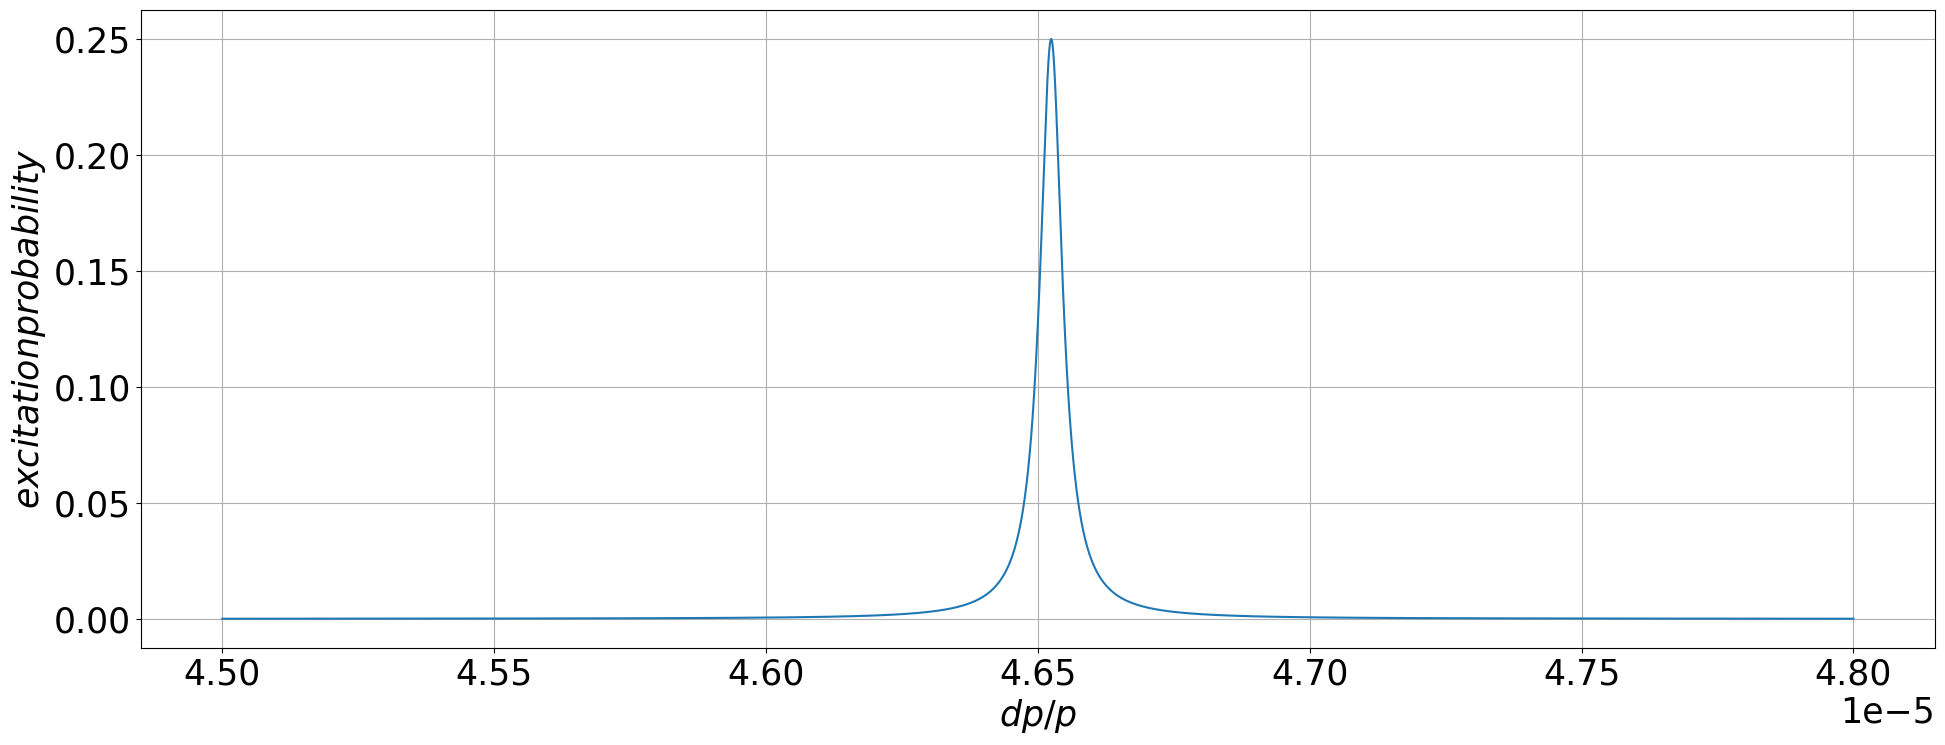

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import constants 

C_LIGHT = 2.99792458e8
hbar = 1.054571817e-34#; // J*sec
QELEM = 1.60217663e-19

#plot with dp/p instead of detuning

ion_excited_lifetime=2.44e-9
gamma_decay=1/ion_excited_lifetime
p0c=12400049491.415041
m0=14903905638.72
gamma0=1.3008551033839242
beta0=0.639579302749178


hc=constants.hbar*C_LIGHT/constants.e # eV*m (ħc)
lambda_0 = 103.76*1e-9 # m -- ion excitation wavelength
hw0 = 2*np.pi*hc/lambda_0 # m -- ion excitation wavelength
cos_theta=1
theta_l=0


laser_wavelength=2.213116311631163e-07
ion_excitation_energy=hw0

axis=1e-1
mid=0


delta_range=np.linspace(mid-axis,mid+axis,int(1e7))
delta_range=np.linspace(4.5e-05,4.8e-5,int(1e6))

K1 = 1


pc = p0c*(1.0+delta_range)#; // eV
gamma = np.sqrt(1.0 + pc*pc/(m0*m0))
beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))

laser_omega_ion_frame = (2.0*np.pi*C_LIGHT/laser_wavelength)*(1.0+beta*cos_theta)*gamma

OmegaTransition = ion_excitation_energy*QELEM/hbar#; // rad/sec
DeltaDetuning = (OmegaTransition - laser_omega_ion_frame)#/(2*gamma)


ratio_ΔΓ_range = DeltaDetuning/gamma_decay


# Calculate the heatmap values using the equation
excitation_prob = 0.5*K1 / ((4*ratio_ΔΓ_range*ratio_ΔΓ_range + K1 + 1))

max_prob = np.max(excitation_prob)
max_prob_index = np.argmax(excitation_prob)

# Find the corresponding delta value
corresponding_max_delta = delta_range[max_prob_index]

print(corresponding_max_delta)

# Create the heatmap
plt.figure(figsize=(20, 8))
plt.rcParams.update({'font.size': 25})
plt.plot(delta_range,excitation_prob)
# plt.title(f'width=2*{axis}')
plt.xlabel(r"$dp/p$")
plt.ylabel(r"$excitation probability$")
plt.grid(True)
plt.tight_layout()
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()


loop over all wavelengths

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import constants
from tqdm import tqdm 

C_LIGHT = 2.99792458e8
hbar = 1.054571817e-34#; // J*sec
QELEM = 1.60217663e-19

#plot with dp/p instead of detuning

ion_excited_lifetime=2.44e-9
gamma_decay=1/ion_excited_lifetime
p0c=12400049491.415041
m0=14903905638.72
gamma0=1.3008551033839242
beta0=0.639579302749178


hc=constants.hbar*C_LIGHT/constants.e # eV*m (ħc)
lambda_0 = 103.76*1e-9 # m -- ion excitation wavelength
hw0 = 2*np.pi*hc/lambda_0 # m -- ion excitation wavelength
cos_theta=1
theta_l=0


#laser_wavelength=222*1e-9#m
ion_excitation_energy=hw0

axis=1e-1
mid=0

laser_range=np.linspace(215*1e-9,225*1e-9,int(1e2))
delta_range=np.linspace(mid-axis,mid+axis,int(1e7))
K1 = 7

corresponding_max_delta_list=[]

for laser_wavelength in tqdm(laser_range):

    pc = p0c*(1.0+delta_range)#; // eV
    gamma = np.sqrt(1.0 + pc*pc/(m0*m0))
    beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))

    laser_omega_ion_frame = (2.0*np.pi*C_LIGHT/laser_wavelength)*(1.0+beta*cos_theta)*gamma

    OmegaTransition = ion_excitation_energy*QELEM/hbar#; // rad/sec
    DeltaDetuning = (OmegaTransition - laser_omega_ion_frame)#/(2*gamma)


    ratio_ΔΓ_range = DeltaDetuning/gamma_decay


    # Calculate the heatmap values using the equation
    excitation_prob = 0.5*K1 / (4*ratio_ΔΓ_range*ratio_ΔΓ_range + K1 + 1)

    max_prob = np.max(excitation_prob)
    max_prob_index = np.argmax(excitation_prob)

    # Find the corresponding delta value
    corresponding_max_delta = delta_range[max_prob_index]

    corresponding_max_delta_list.append(corresponding_max_delta)

#np.savez('/home/pkruyt/cernbox/laser_cooling/latex_plots/results', corresponding_max_delta_list=corresponding_max_delta_list,laser_range=laser_range,delta_range=delta_range)

loaded_data = np.load('/home/pkruyt/cernbox/laser_cooling/latex_plots/results.npz')

# Access the individual arrays or variables
corresponding_max_delta_list = loaded_data['corresponding_max_delta_list']
laser_range = loaded_data['laser_range']
delta_range = loaded_data['delta_range']

delta_range.shape

100%|██████████| 100/100 [00:34<00:00,  2.88it/s]


(10000000,)

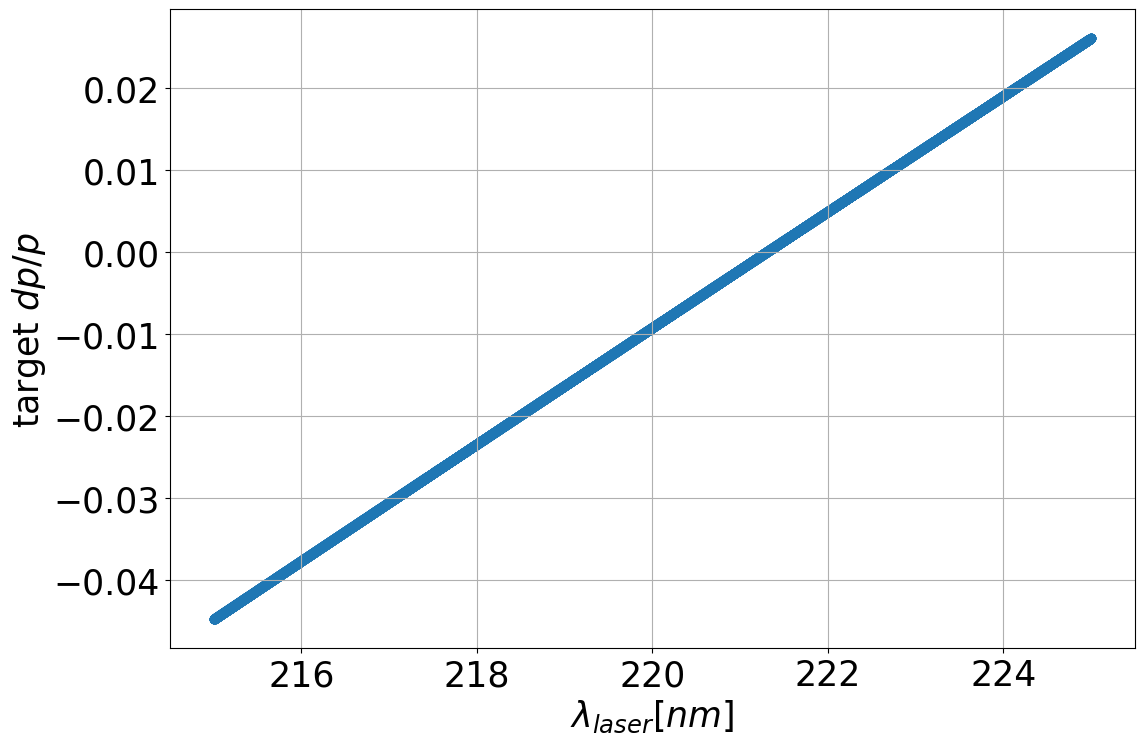

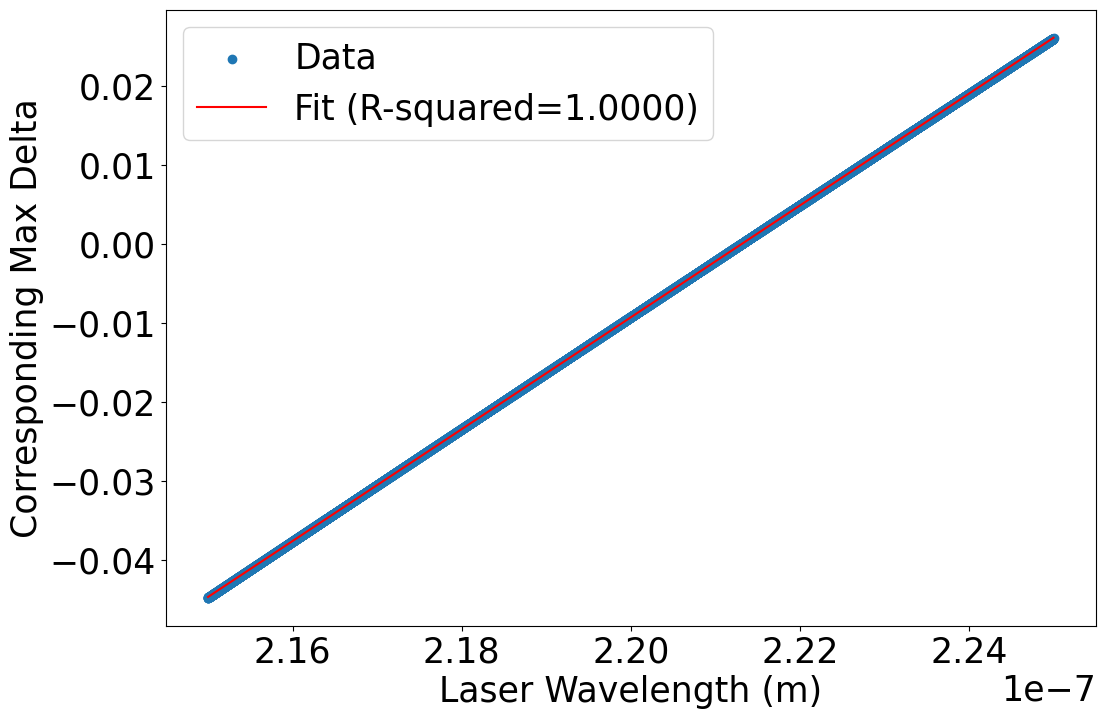

Slope: 7080583.968682445
Intercept: -1.5670073499480257


In [4]:
# Create the heatmap
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.scatter(laser_range*1e9,corresponding_max_delta_list)
plt.xlabel("$\lambda_{laser} [nm]$")
plt.ylabel(r"target $dp/p$")
plt.grid(True)
plt.tight_layout()
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()

#fit straight line
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Convert the data to NumPy arrays
x = np.array(laser_range)
y = np.array(corresponding_max_delta_list)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the fitted values
y_fit = slope * x + intercept

# Plot the data and the fitted line
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.scatter(x, y, label='Data')
plt.plot(x, y_fit, 'r', label=f'Fit (R-squared={r_value**2:.4f})')
plt.xlabel('Laser Wavelength (m)')
plt.ylabel('Corresponding Max Delta')
plt.legend()
plt.show()

# Print the slope and intercept of the fitted line
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')

attempt the fitted curve

100%|██████████| 1000000/1000000 [00:01<00:00, 622710.51it/s]


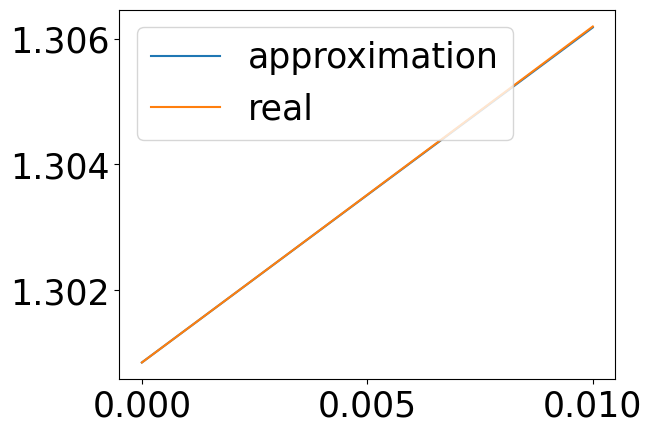

In [5]:
delta_range=np.linspace(0,1e-2,int(1e6))

gamma_peter_list=[]
gamma_real_list = []
for delta_loop in tqdm(delta_range):

   
    gamma_real=np.sqrt(1+(p0c/m0)**2*(1+delta_loop)**2)
    #gamma_peter_approx = np.sqrt(1 + (p0c / m0) ** 2) + delta_loop * p0c ** 2 / (m0 ** 2 * np.sqrt(1 + (p0c / m0) ** 2))
    gamma_peter_approx = gamma0 + delta_loop*p0c**2/(m0**2*gamma0)

    gamma_peter_list.append(gamma_peter_approx)
    gamma_real_list.append(gamma_real)

    #gamma_peter_list.append(gamma_peter)

plt.figure()
plt.plot(delta_range,gamma_peter_list,label='approximation')
plt.plot(delta_range,gamma_real_list,label='real')
plt.legend()
plt.show()

100%|██████████| 10000/10000 [00:00<00:00, 470825.74it/s]


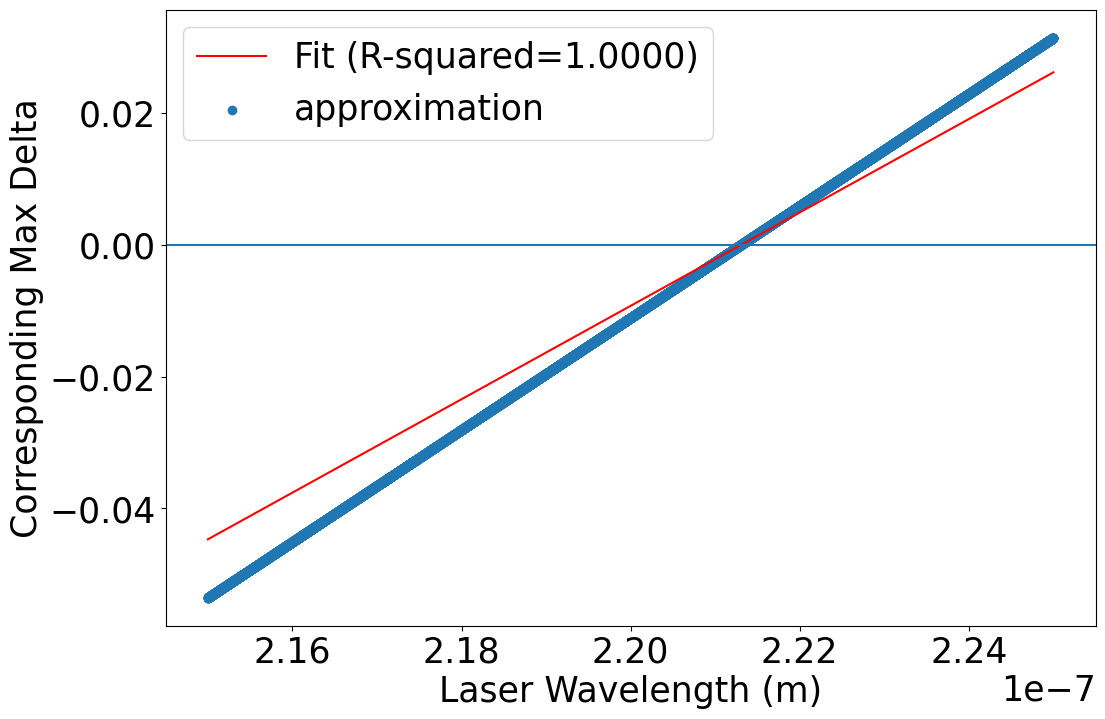

In [6]:
# laser_range=np.linspace(215*1e-9,225*1e-9,int(1e2))
target_delta_approx_list=[]

for lambda_loop in tqdm(laser_range):
    
    beta1=((p0c/m0)**2)*(1+delta_loop)
    term1=2*np.pi*C_LIGHT*gamma0/lambda_loop
    term2=2*np.pi*C_LIGHT*beta0*gamma0/lambda_loop
    term3=(2*np.pi*C_LIGHT*gamma0/lambda_loop)*p0c**2/(gamma0*m0**2)
    term4=(2*np.pi*C_LIGHT*beta0*gamma0/lambda_loop)*p0c**2/(gamma0*m0**2)

    #term4=(2*np.pi*C_LIGHT*gamma0/lambda_loop)*p0c**4/(gamma0**2*m0**4)


    target_delta_approx=(OmegaTransition-term1-term2)/(term3+term4)
    target_delta_approx_list.append(target_delta_approx)


# Plot the data and the fitted line
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.plot(x, y_fit, 'r', label=f'Fit (R-squared={r_value**2:.4f})')
plt.scatter(laser_range,target_delta_approx_list,label='approximation')
plt.axhline(0)
plt.xlabel('Laser Wavelength (m)')
plt.ylabel('Corresponding Max Delta')
plt.legend()
plt.show()

second attempt

100%|██████████| 10000/10000 [00:00<00:00, 553294.46it/s]


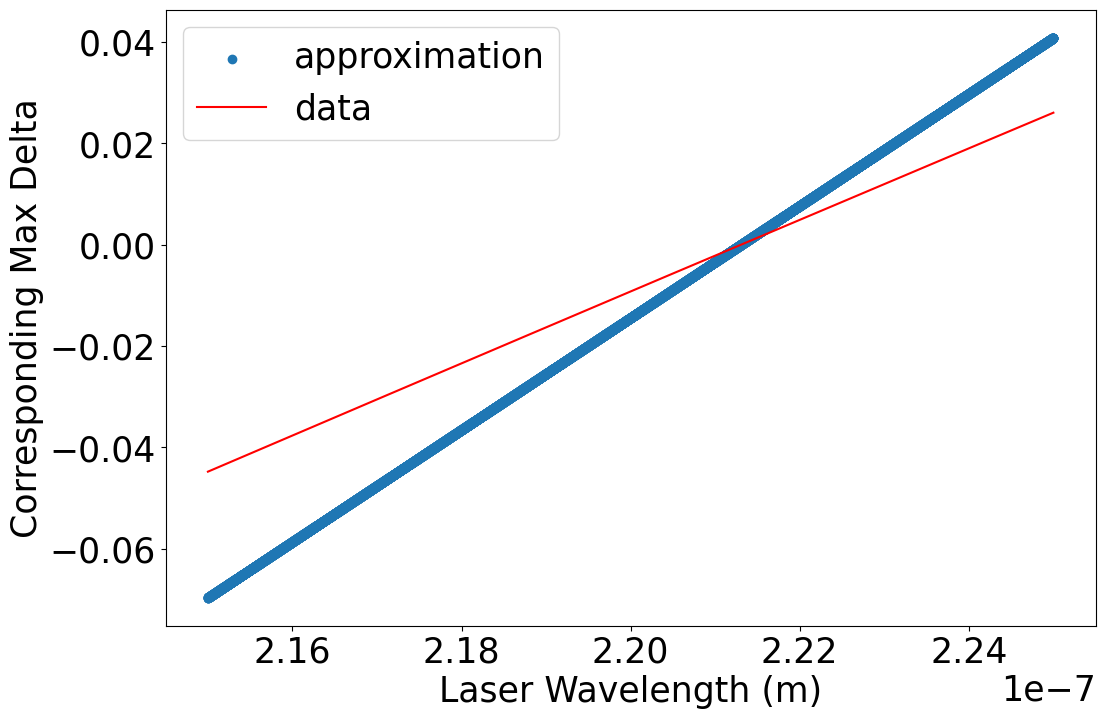

intercept_approx : -2.4446190828402363
intercept        : -1.5670073499480257
slope_approx     : 2.48543494023252
slope            : 7080583.968682445


In [7]:
# laser_range=np.linspace(215*1e-9,225*1e-9,int(1e2))
target_delta_approx_list=[]

for lambda_loop in tqdm(laser_range):
    
    beta1=((p0c/m0)**2)*(1+delta_loop)
    term1=lambda_loop*OmegaTransition/(2*np.pi*C_LIGHT*(1+beta0))

    denominator=p0c**2/(gamma0*m0**2)
    slope_approx=lambda_loop*OmegaTransition/(2*np.pi*C_LIGHT*(1+beta0))/denominator
    intercept_approx=-gamma0/denominator
    
    target_delta_approx=(term1-gamma0)/(denominator)
    
    # target_delta_approx=(term1-gamma0)/(denominator)
    
    target_delta_approx_list.append(target_delta_approx)

plt.figure(figsize=(12, 8))
plt.scatter(laser_range,target_delta_approx_list,label=f'approximation')
plt.plot(x,y,label='data',color='red')
plt.xlabel('Laser Wavelength (m)')
plt.ylabel('Corresponding Max Delta')
plt.legend()
plt.show()

print('intercept_approx :',intercept_approx)
print('intercept        :',intercept)

print('slope_approx     :',slope_approx)
print('slope            :',slope)

In [8]:
# lambda1_list=[]
# for delta1 in delta_range1:

#     term1=2*np.pi*C_LIGHT/OmegaTransition
#     term2=1+beta0
#     gamma_peter_approx = gamma0 + delta1*p0c**2/(m0**2*gamma0)

#     lambda1=term1*term2*gamma_peter_approx
#     lambda1_list.append(lambda1)

# lambda2 = (delta_range1 - intercept)/slope


# # Plot the data and the fitted line
# plt.figure(figsize=(12, 8))
# plt.rcParams.update({'font.size': 25})
# #plt.plot(laser_range, intercept + slope * laser_range, 'r', label=f'Fit (R-squared={r_value**2:.4f})')
# #plt.plot(x, laser_range,label=f'Fit (R-squared={r_value**2:.4f})')
# plt.plot(delta_range1, lambda1_list, label=f'approximation')
# plt.plot(delta_range1, lambda2, label=f'data')
# #plt.scatter(laser_range,target_delta_approx_list,label='approximation')
# # plt.axhline(0)
# plt.ylabel('Laser Wavelength (m)')
# plt.xlabel('Corresponding Max Delta')
# plt.legend()
# plt.show()

In [9]:
OmegaTransition

1.815392794680292e+16

In [10]:
# Define the desired value of dp/p
desired_dp_over_p = 5e-5

# Find the index where dp/p is closest to the desired value
closest_index = np.argmin(np.abs(np.array(corresponding_max_delta_list) - desired_dp_over_p))

# Find the corresponding laser wavelength
corresponding_wavelength = laser_range[closest_index]
closest_dp_over_p = corresponding_max_delta_list[closest_index]


corresponding_frequency = C_LIGHT / corresponding_wavelength

print(f"Wavelength Corresponding to dp/p = {desired_dp_over_p}:", corresponding_wavelength)
print(f"Closest dp/p to {desired_dp_over_p}:", closest_dp_over_p)
print(f"Corresponding Frequency: {corresponding_frequency} Hz")


Wavelength Corresponding to dp/p = 5e-05: 2.213116311631163e-07
Closest dp/p to 5e-05: 4.653000465298929e-05
Corresponding Frequency: 1354616819840977.5 Hz


In [11]:
# Define the Corresponding Max Delta value you want to find the wavelength for
desired_delta = 5e-5

# Calculate the corresponding Laser Wavelength
corresponding_wavelength = (desired_delta - intercept) / slope

corresponding_frequency = C_LIGHT / corresponding_wavelength

# Print the result
print(f"Laser Wavelength for Corresponding Max Delta {desired_delta}: {corresponding_wavelength} m")
print(f"Corresponding Frequency: {corresponding_frequency} Hz")


Laser Wavelength for Corresponding Max Delta 5e-05: 2.21317529299723e-07 m
Corresponding Frequency: 1354580719153072.8 Hz


Top edge

In [12]:
# linewidth_freq=1e6 #Hz
# freq_total=corresponding_frequency+0*linewidth_freq

# print(f"Corresponding Frequency - linewidth: {freq_total} Hz")


# wavelength_edge=C_LIGHT/freq_total

# # Calculate the Corresponding Max Delta (y) using the linear fit equation
# corresponding_dp_p_edge = slope * wavelength_edge + intercept

# # print(f"Edge wavelength: {wavelength_edge} m")

# # print(f"difference edge and centre wavelength: {corresponding_wavelength-wavelength_edge} m")

# # # Find the index of the edge wavelength in the laser_range
# # edge_wavelength_index = np.argmin(np.abs(np.array(laser_range) - wavelength_edge))

# # # Find the corresponding dp/p value for the edge wavelength
# # corresponding_dp_p_edge = corresponding_max_delta_list[edge_wavelength_index]

# print(f"Corresponding dp/p for Edge Wavelength: {corresponding_dp_p_edge}")


Bottom edge

In [13]:
# linewidth_freq=1e6 #Hz
# freq_total=corresponding_frequency-linewidth_freq

# print(f"Corresponding Frequency - linewidth: {freq_total} Hz")


# wavelength_edge=C_LIGHT/freq_total

# # Calculate the Corresponding Max Delta (y) using the linear fit equation
# corresponding_dp_p_edge = slope * wavelength_edge + intercept

# # print(f"Edge wavelength: {wavelength_edge} m")

# # print(f"difference edge and centre wavelength: {corresponding_wavelength-wavelength_edge} m")

# # # Find the index of the edge wavelength in the laser_range
# # edge_wavelength_index = np.argmin(np.abs(np.array(laser_range) - wavelength_edge))

# # # Find the corresponding dp/p value for the edge wavelength
# # corresponding_dp_p_edge = corresponding_max_delta_list[edge_wavelength_index]

# print(f"Corresponding dp/p for Edge Wavelength: {corresponding_dp_p_edge}")
# print(f"Difference dp/p between center and edge: {corresponding_dp_p_edge-5e-5}")

Eidam FWHM equation

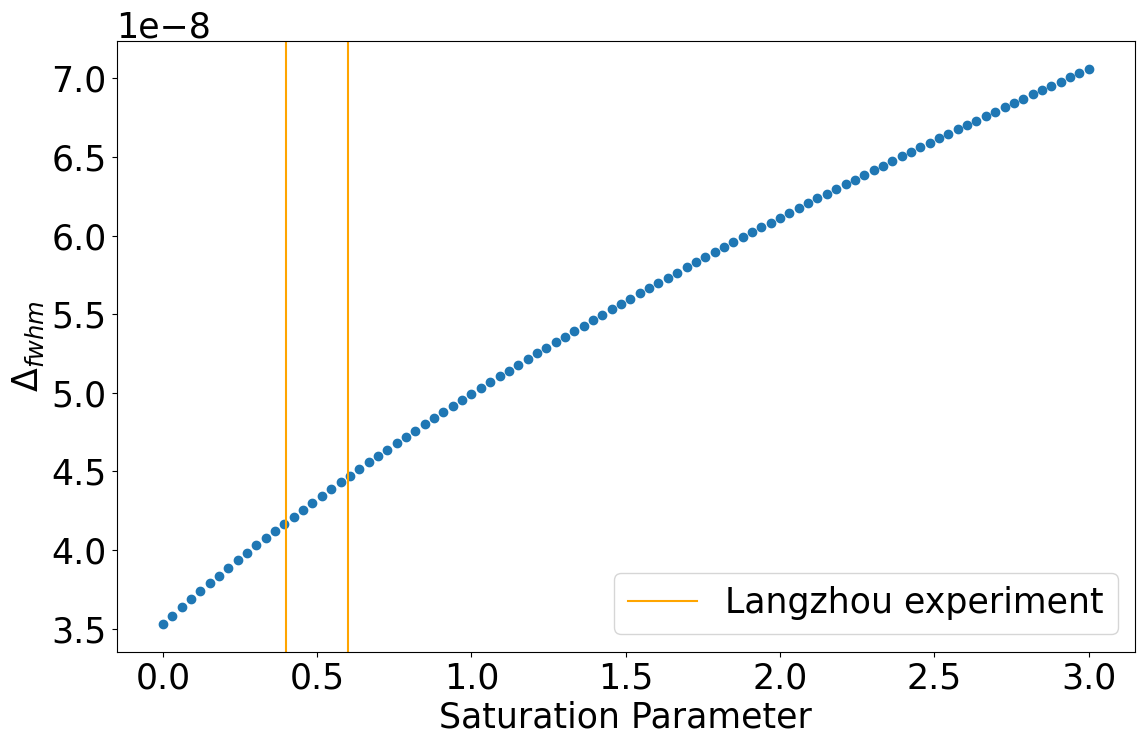

Closest Delta_fwhm to saturation_parameter = 8.7: 7.059729866417754e-08
Closest Delta_fwhm to saturation_parameter = 0.51: 4.43101060785433e-08


In [14]:
laser_wavelength = 2.213116311631163e-07
saturation_parameter=np.linspace(0,3,100)
# Calculate the expression
delta_fwhm = (np.sqrt(1 + saturation_parameter) * laser_wavelength) / (2 * np.pi * (ion_excited_lifetime) * (1 + beta0) * beta0 * gamma0 * C_LIGHT)



# Create the heatmap
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.scatter(saturation_parameter,delta_fwhm)
plt.xlabel("Saturation Parameter")
plt.ylabel("$\Delta_{fwhm}$")
# plt.axvline(8.6,color='red')
# plt.axvline(8.8,color='red',label='')
plt.axvline(0.6,color='orange',label='Langzhou experiment')
plt.axvline(0.4,color='orange')
plt.legend()
plt.tight_layout()
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()

# Find the index of the closest value to 8.7 in saturation_parameter
closest_index = np.argmin(np.abs(saturation_parameter - 8.7))
result = delta_fwhm[closest_index]
closest_saturation_parameter = saturation_parameter[closest_index]

k1=0.564690

closest_index2 = np.argmin(np.abs(saturation_parameter - k1))
result2 = delta_fwhm[closest_index2]
closest_saturation_parameter = saturation_parameter[closest_index2]

k1=0.564690

print("Closest Delta_fwhm to saturation_parameter = 8.7:", result)
print("Closest Delta_fwhm to saturation_parameter = 0.51:", result2)


map slices

lorentzian width: 7.370607370607156e-08


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


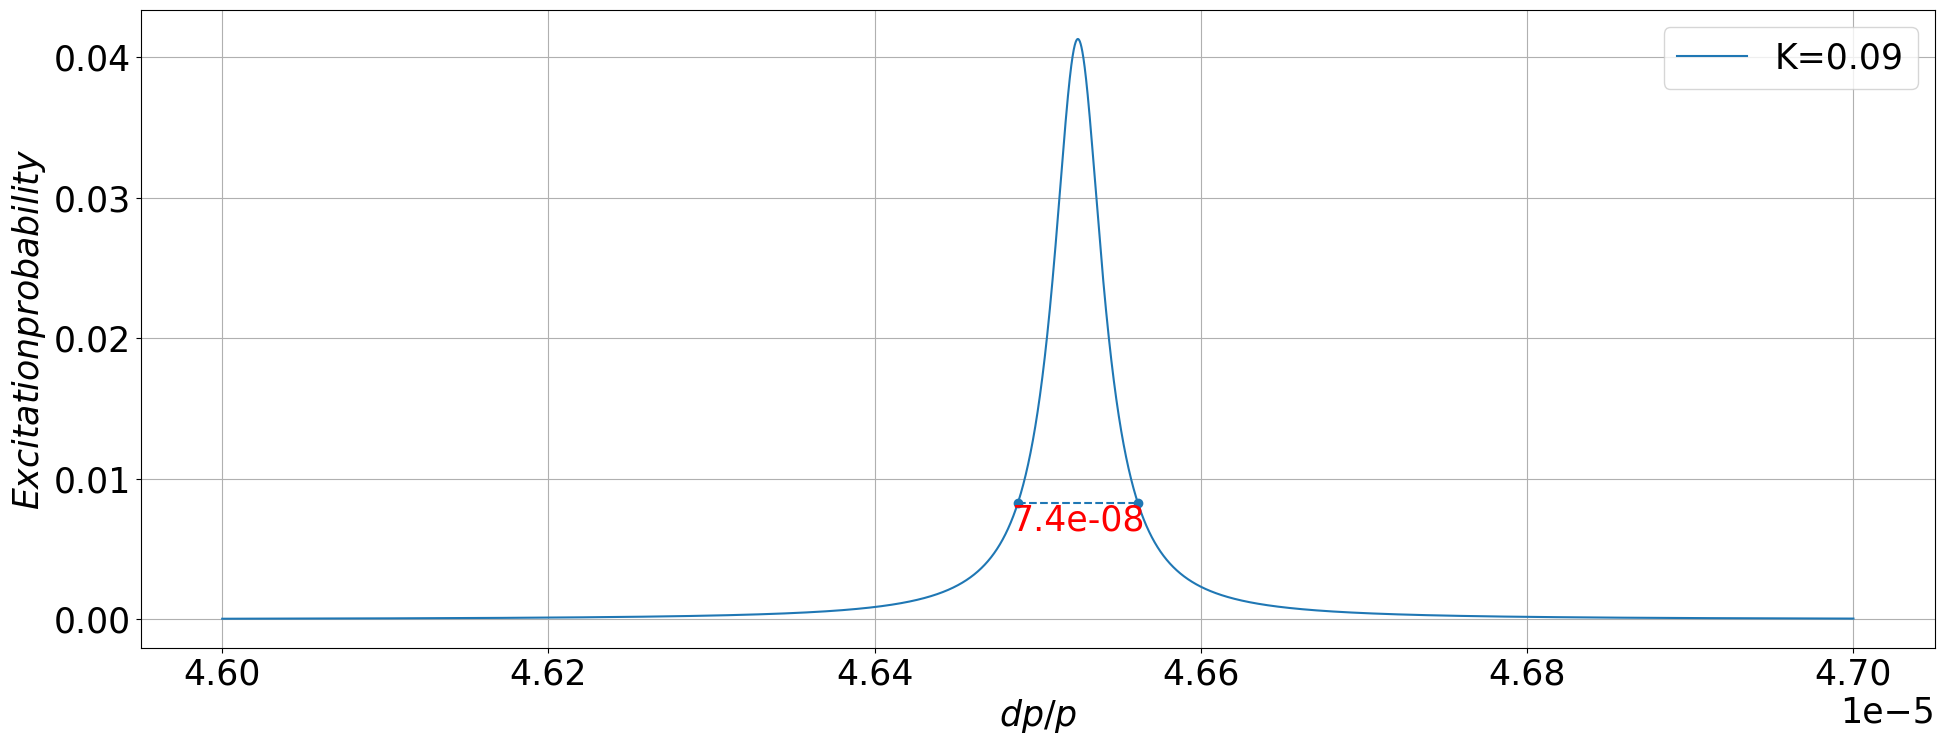

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import constants 

C_LIGHT = 2.99792458e8
hbar = 1.054571817e-34#; // J*sec
QELEM = 1.60217663e-19

#plot with dp/p instead of detuning

ion_excited_lifetime=2.44e-9
gamma_decay=1/ion_excited_lifetime
p0c=12400049491.415041
m0=14903905638.72
gamma0=1.3008551033839242
beta0=0.639579302749178


hc=constants.hbar*C_LIGHT/constants.e # eV*m (ħc)
lambda_0 = 103.76*1e-9 # m -- ion excitation wavelength
hw0 = 2*np.pi*hc/lambda_0 # m -- ion excitation wavelength
cos_theta=1
theta_l=0


laser_wavelength=2.21317529299723e-07
# laser_wavelength=2.213116311631163e-07
laser_wavelength=2.213116311631163e-07
ion_excitation_energy=hw0

delta_range=np.linspace(4.6e-05,4.7e-5,int(1e6))
# delta_range=np.linspace(4.2e-05,5e-5,int(1e6))
k1=0.090350
#saturation_parameter_list=[1,5,10]
saturation_parameter_list=[9e-2]
#saturation_parameter_list=[0.56,0.023,0.0056]
lorentzian_width_list=[]
colors = ['b', 'r', 'g']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(20, 8))
plt.rcParams.update({'font.size': 25})
for i, K1 in enumerate(saturation_parameter_list):

    delta_fwhm = (np.sqrt(1 + K1) * laser_wavelength) / (2 * np.pi * (ion_excited_lifetime) * (1 + beta0) * beta0 * gamma0 * C_LIGHT)
    
    pc = p0c*(1.0+delta_range)#; // eV
    gamma = np.sqrt(1.0 + pc*pc/(m0*m0))
    beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))

    laser_omega_ion_frame = (2.0*np.pi*C_LIGHT/laser_wavelength)*(1.0+beta*cos_theta)*gamma

    OmegaTransition = ion_excitation_energy*QELEM/hbar#; // rad/sec
    DeltaDetuning = (OmegaTransition - laser_omega_ion_frame)#/(2*gamma)


    ratio_ΔΓ_range = DeltaDetuning/gamma_decay

    # Calculate the heatmap values using the equation
    excitation_prob = 0.5*K1 / (4*ratio_ΔΓ_range*ratio_ΔΓ_range + K1 + 1)
   
    max_prob = np.max(excitation_prob)
    max_prob_index = np.argmax(excitation_prob)

    # Find the corresponding delta value
    corresponding_max_delta = delta_range[max_prob_index]

    #print(corresponding_max_delta)

    top_index = np.argmin(np.abs(delta_range - (corresponding_max_delta + delta_fwhm)))
    top_delta = delta_range[top_index]

    bottom_index = np.argmin(np.abs(delta_range - (corresponding_max_delta - delta_fwhm)))
    bottom_delta = delta_range[bottom_index]

    lorentzian_width=top_delta-bottom_delta

    # custom_delta=5e-5
    # custom_delta_index=np.argmin(np.abs(delta_range - custom_delta))
    # custom_excitation=excitation_prob[custom_delta_index]
    # plt.scatter(custom_delta,0,color='black')
    # plt.text(custom_delta, 0.005, f'{custom_excitation:.2e}', color='black')

    # custom_delta2=4.7e-5
    # custom_delta_index2=np.argmin(np.abs(delta_range - custom_delta2))
    # custom_excitation2=excitation_prob[custom_delta_index2]
    # plt.scatter(custom_delta2,0,color='black')
    # plt.text(custom_delta2, 0.005, f'{custom_excitation2:.2e}', color='black')

    # print(custom_excitation)

    print('lorentzian width:',lorentzian_width)
    # print('last probability value:', f'{excitation_prob[-1]:e}')
    
    lorentzian_width_list.append(lorentzian_width)
    
    plt.plot(delta_range,excitation_prob,label=f'K={K1}',color=colors[i])
    plt.scatter(top_delta, excitation_prob[top_index], color=colors[i])
    plt.scatter(bottom_delta, excitation_prob[bottom_index], color=colors[i])
    plt.hlines(y=excitation_prob[bottom_index], xmin=bottom_delta, xmax=top_delta, colors=colors[i], linestyle='--')

    distance_text = f'{top_delta - bottom_delta:.1e}'
    plt.text((top_delta + bottom_delta) / 2, excitation_prob[bottom_index], distance_text, ha='center', va='top', color='red')
    
    
    # plt.title(f'width=2*{axis}')
    plt.xlabel(r"$dp/p$")
    plt.ylabel(r"$Excitation probability$")
    plt.grid(True)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.tight_layout()
    plt.legend()
    # plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    
plt.savefig('lorentzian.eps', format='eps', dpi=300)    
plt.savefig('lorentzian.png', format='png', dpi=300)

plt.show()



k1 0.5646408988888836
lorentzian width: 8.830608830608523e-08
k1 0.09034254382222137
lorentzian width: 7.371807371807181e-08
k1 0.022585635955555343
lorentzian width: 7.139007139007132e-08
k1 0.005646408988888836
lorentzian width: 7.079607079607265e-08


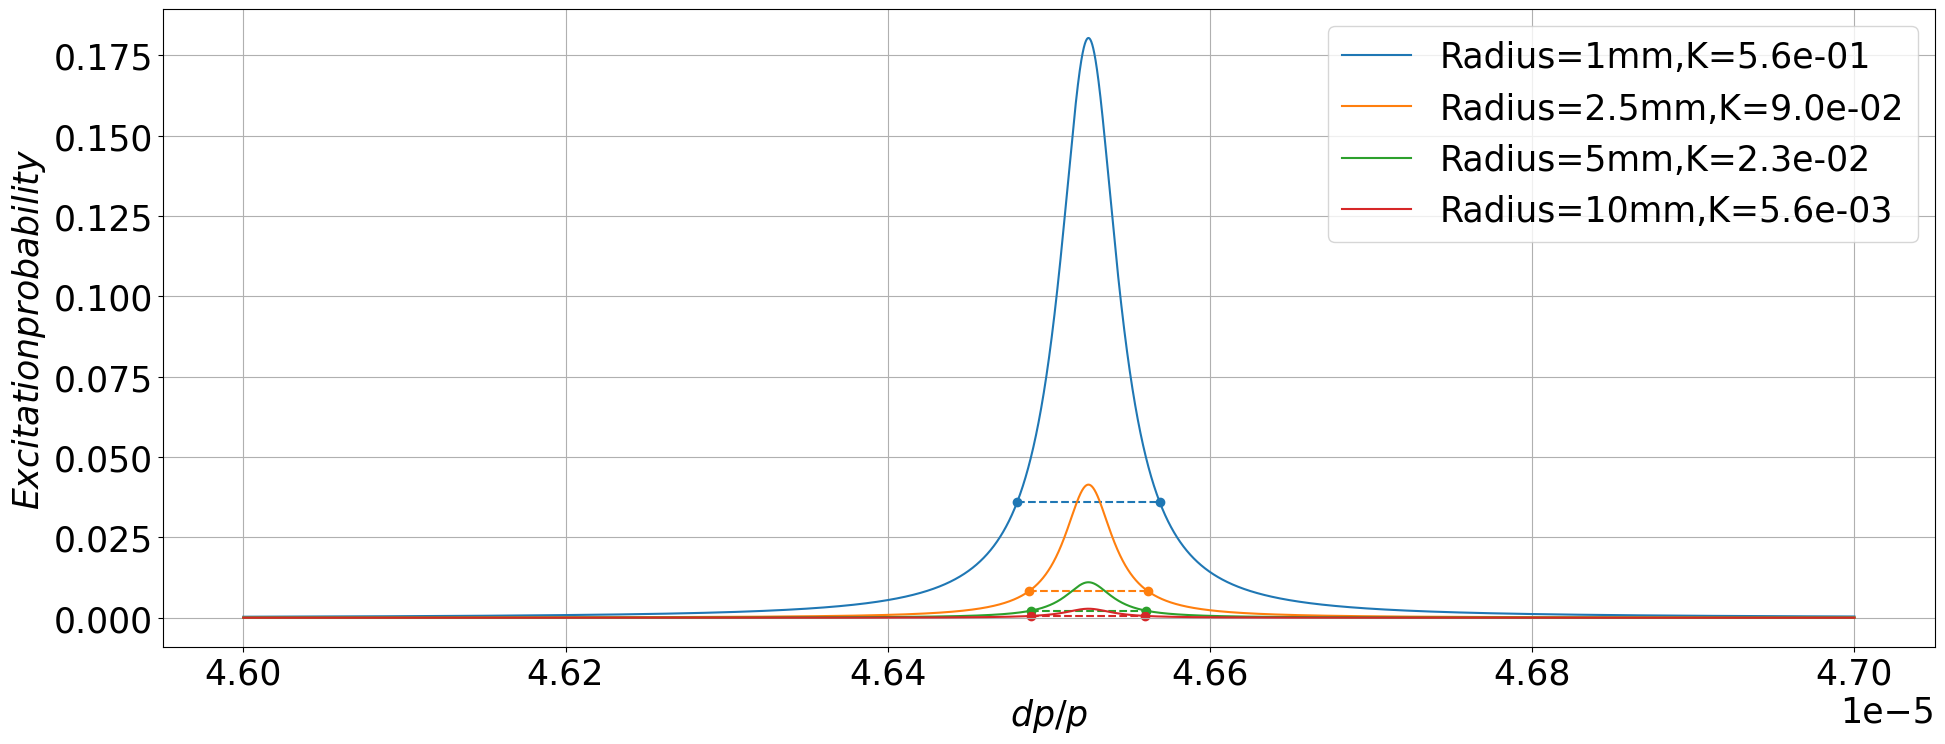

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import constants 

C_LIGHT = 2.99792458e8
hbar = 1.054571817e-34#; // J*sec
QELEM = 1.60217663e-19

#plot with dp/p instead of detuning

ion_excited_lifetime=2.44e-9
gamma_decay=1/ion_excited_lifetime
p0c=12400049491.415041
m0=14903905638.72
gamma0=1.3008551033839242
beta0=0.639579302749178


hc=constants.hbar*C_LIGHT/constants.e # eV*m (ħc)
lambda_0 = 103.76*1e-9 # m -- ion excitation wavelength
hw0 = 2*np.pi*hc/lambda_0 # m -- ion excitation wavelength
cos_theta=1
theta_l=0


laser_wavelength=2.21317529299723e-07
# laser_wavelength=2.213116311631163e-07
laser_wavelength=2.213116311631163e-07
ion_excitation_energy=hw0

delta_range=np.linspace(4.6e-05,4.7e-5,int(1e6))
# delta_range=np.linspace(4.2e-05,5e-5,int(1e6))

lorentzian_width_list=[]
colors = ['b', 'r', 'g']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
radius_list = ['1mm','2.5mm', '5mm', '10mm']
laser_waist_radius_list = [float(radius[:-2]) * 1e-3 for radius in radius_list]
plt.figure(figsize=(20, 8))
plt.rcParams.update({'font.size': 25})
for i, laser_waist_radius in enumerate(laser_waist_radius_list):

    
    laser_power=40*1e-3 #W
    laser_area=np.pi*laser_waist_radius*laser_waist_radius
    laser_intensity=laser_power/laser_area

    pc = p0c*(1.0+delta_range)#; // eV
    gamma = np.sqrt(1.0 + pc*pc/(m0*m0))
    beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))    

    laser_intensity_ion_frame = 4.0*gamma0*gamma0 * laser_intensity # should be gamma not gamma0!!!!!!!!! 

    # print('laser_intensity_ion_frame',laser_intensity_ion_frame)

    OmegaRabi = C_LIGHT*np.sqrt(6*np.pi)*np.sqrt(laser_intensity_ion_frame)/np.sqrt(hbar*ion_excited_lifetime*(OmegaTransition**3))
    
    k1=OmegaRabi*OmegaRabi/(gamma_decay*gamma_decay)
    K1=k1

    print('k1',k1)

    delta_fwhm = (np.sqrt(1 + K1) * laser_wavelength) / (2 * np.pi * (ion_excited_lifetime) * (1 + beta0) * beta0 * gamma0 * C_LIGHT)
    
   

    laser_omega_ion_frame = (2.0*np.pi*C_LIGHT/laser_wavelength)*(1.0+beta*cos_theta)*gamma

    OmegaTransition = ion_excitation_energy*QELEM/hbar#; // rad/sec
    DeltaDetuning = (OmegaTransition - laser_omega_ion_frame)#/(2*gamma)

    
    ratio_ΔΓ_range = DeltaDetuning/gamma_decay
    

    # Calculate the heatmap values using the equation
    excitation_prob = 0.5*K1 / (4*ratio_ΔΓ_range*ratio_ΔΓ_range + K1 + 1)
   
    max_prob = np.max(excitation_prob)
    max_prob_index = np.argmax(excitation_prob)

    # Find the corresponding delta value
    corresponding_max_delta = delta_range[max_prob_index]

    #print(corresponding_max_delta)

    top_index = np.argmin(np.abs(delta_range - (corresponding_max_delta + delta_fwhm)))
    top_delta = delta_range[top_index]

    bottom_index = np.argmin(np.abs(delta_range - (corresponding_max_delta - delta_fwhm)))
    bottom_delta = delta_range[bottom_index]

    lorentzian_width=top_delta-bottom_delta

    custom_delta=5e-5
    custom_delta_index=np.argmin(np.abs(delta_range - custom_delta))
    custom_excitation=excitation_prob[custom_delta_index]
    # plt.scatter(custom_delta,0,color='black')
    # plt.text(custom_delta, 0.005, f'{custom_excitation:.2e}', color='black')

    # custom_delta2=4.7e-5
    # custom_delta_index2=np.argmin(np.abs(delta_range - custom_delta2))
    # custom_excitation2=excitation_prob[custom_delta_index2]
    # plt.scatter(custom_delta2,0,color='black')
    # plt.text(custom_delta2, 0.005, f'{custom_excitation2:.2e}', color='black')

    # print(custom_excitation)

    print('lorentzian width:',lorentzian_width)
    # print('last probability value:', f'{excitation_prob[-1]:e}')
    
    lorentzian_width_list.append(lorentzian_width)
    
    plt.plot(delta_range,excitation_prob,label=f'Radius={radius_list[i]},K={K1:.1e}',color=colors[i])
    plt.scatter(top_delta, excitation_prob[top_index], color=colors[i])
    plt.scatter(bottom_delta, excitation_prob[bottom_index], color=colors[i])
    plt.hlines(y=excitation_prob[bottom_index], xmin=bottom_delta, xmax=top_delta, colors=colors[i], linestyle='--')
    
    
    # plt.title(f'width=2*{axis}')
    plt.xlabel(r"$dp/p$")
    plt.ylabel(r"$Excitation probability$")
    plt.grid(True)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.tight_layout()
    plt.legend()
    # plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# plt.savefig('lorentzian.png', format='png', dpi=300)

plt.show()



In [17]:
laser_power=40*1e-3
laser_waist_radius = 1*1e-3
laser_area=np.pi*(laser_waist_radius*laser_waist_radius)

laser_waist_radius = 1000*1e-3
laser_intensity=200000
laser_intensity=laser_power/laser_area

print(laser_intensity)

12732.395447351628


Effect of angles on excitation

100%|██████████| 1000/1000 [00:07<00:00, 133.36it/s]


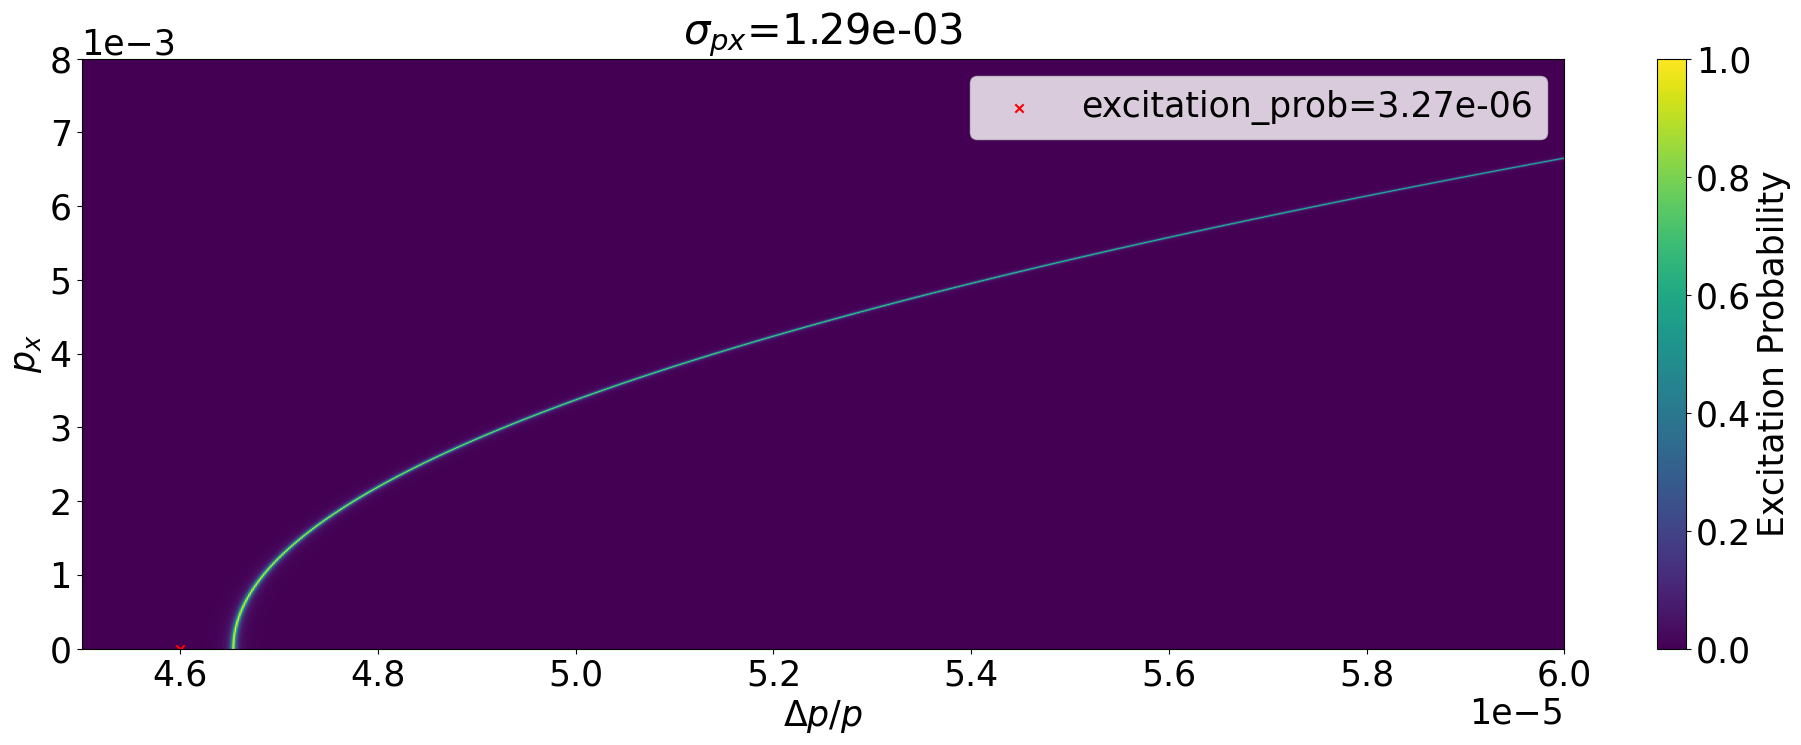

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import constants 
from tqdm import tqdm 

C_LIGHT = 2.99792458e8
hbar = 1.054571817e-34#; // J*sec
QELEM = 1.60217663e-19

#plot with dp/p instead of detuning

ion_excited_lifetime=2.44e-9
gamma_decay=1/ion_excited_lifetime
p0c=12400049491.415041
m0=14903905638.72
gamma0=1.3008551033839242
beta0=0.639579302749178


hc=constants.hbar*C_LIGHT/constants.e # eV*m (ħc)
lambda_0 = 103.76*1e-9 # m -- ion excitation wavelength
hw0 = 2*np.pi*hc/lambda_0 # m -- ion excitation wavelength

emittance_x=10*1e-6 #inital emittance
emittance_y=15*1e-6 #inital emittance

beta_x = 6
beta_y = 2
disp_x = 0

# num_particles = int(1e2)

# sigma_x = np.sqrt(beta_x*emittance_x)
sigma_px = np.sqrt(emittance_x*1/beta_x)
# sigma_y = np.sqrt(beta_y*emittance_y)
sigma_py = np.sqrt(emittance_y*1/beta_y)
sigma_total = np.sqrt(sigma_px**2 + sigma_py**2)

# sigma_p = 2e-5 # relative ion momentum spread
# sigma_p = 2e-4 # relative ion momentum spread

# delta = np.random.uniform(low=0.4e-4, high=0.6e-4, size=num_particles)

# delta = np.random.uniform(low=0e-4, high=1e-4, size=num_particles)

# # delta = np.random.normal(loc=0, scale=sigma_p, size=num_particles)
# x = np.random.normal(loc=0.0, scale=sigma_x, size=num_particles) + disp_x * delta
# px = np.random.normal(loc=0.0, scale=sigma_px, size=num_particles)
# y = np.random.normal(loc=0.0, scale=sigma_y, size=num_particles)
# py = np.random.normal(loc=0.0, scale=sigma_py, size=num_particles)



# delta_range=np.linspace(4.6e-05,4.7e-5,int(1e6))
# delta_range=np.linspace(4.2e-05,5e-5,int(1e6))


delta_fwhm = (np.sqrt(1 + K1) * laser_wavelength) / (2 * np.pi * (ion_excited_lifetime) * (1 + beta0) * beta0 * gamma0 * C_LIGHT)



# Define a grid of delta and px values
#delta_range = np.linspace(0.464e-4, 0.800e-4, 100)
delta_range = np.linspace(0.45e-4, 0.6e-4, 1000)
px_range = np.linspace(0, 8e-3, 1000)

# Create a 2D grid of delta and px values using meshgrid
delta_grid, px_grid = np.meshgrid(delta_range, px_range)

# Create an empty 2D grid for the excitation probability
excitation_prob_grid = np.zeros_like(delta_grid)

for i in tqdm(range(len(delta_range))):
    for j in range(len(px_range)):
        delta = delta_range[i]
        px = px_range[j]
        py=0

        pc = p0c*(1.0+delta)
        gamma = np.sqrt(1.0 + pc*pc/(m0*m0))
        beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))
        beta_x  = px*p0c/m0/gamma
        beta_y  = py*p0c/m0/gamma
        
        beta_z  = np.sqrt(beta*beta - beta_x*beta_x -beta_y*beta_y)

        vx  = C_LIGHT*beta_x
        vy  = C_LIGHT*beta_y
        vz  = C_LIGHT*beta_z

        nx=0
        ny=0
        nz=-1
        cos_theta=-(nx*vx + ny*vy + nz*vz)/(beta*C_LIGHT)
        theta_l=0


        laser_wavelength=2.21317529299723e-07
        # laser_wavelength=2.213116311631163e-07
        laser_wavelength=2.213116311631163e-07
        ion_excitation_energy=hw0

        pc = p0c*(1.0+delta)#; // eV
        gamma = np.sqrt(1.0 + pc*pc/(m0*m0))
        beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))

        laser_omega_ion_frame = (2.0*np.pi*C_LIGHT/laser_wavelength)*(1.0+beta*cos_theta)*gamma

        OmegaTransition = ion_excitation_energy*QELEM/hbar#; // rad/sec
        DeltaDetuning = (OmegaTransition - laser_omega_ion_frame)#/(2*gamma)

        ratio_ΔΓ_range = DeltaDetuning/gamma_decay

        # Calculate the heatmap values using the equation
        excitation_prob = 0.5*K1 / (4*ratio_ΔΓ_range*ratio_ΔΓ_range + K1 + 1)

        excitation_prob_grid[j, i] = excitation_prob
        #excitation_prob_grid[i, j] = excitation_prob
        


specific_delta = 0.46e-4
specific_px = 0

# Find the indices corresponding to the specific point
idx_delta = np.argmin(np.abs(delta_range - specific_delta))
idx_px = np.argmin(np.abs(px_range - specific_px))

# Retrieve the excitation probability at the specific point
specific_excitation_prob = excitation_prob_grid[idx_px, idx_delta]

        
plt.figure(figsize=(20, 8))
plt.title('$\sigma_{px}$'f'={sigma_px:.2e}')
plt.imshow(excitation_prob_grid, extent=[delta_range[0], delta_range[-1], px_range[0], px_range[-1]], origin='lower', cmap='viridis', aspect='auto')
plt.scatter(specific_delta, specific_px, color='red', marker='x', label=f'excitation_prob={specific_excitation_prob:.2e}')
#plt.scatter(px_range,cos_theta)
plt.colorbar(label='Excitation Probability')
plt.xlabel(r"$\Delta p / p$")
plt.ylabel(r"$p_{x}$")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend()
plt.tight_layout()
# plt.savefig('transverse_momentum_linewidth(x+y).eps', format='eps', dpi=300)
plt.savefig('transverse_momentum_linewidth.png', format='png', dpi=300)
plt.show()


100%|██████████| 1000/1000 [00:08<00:00, 124.57it/s]


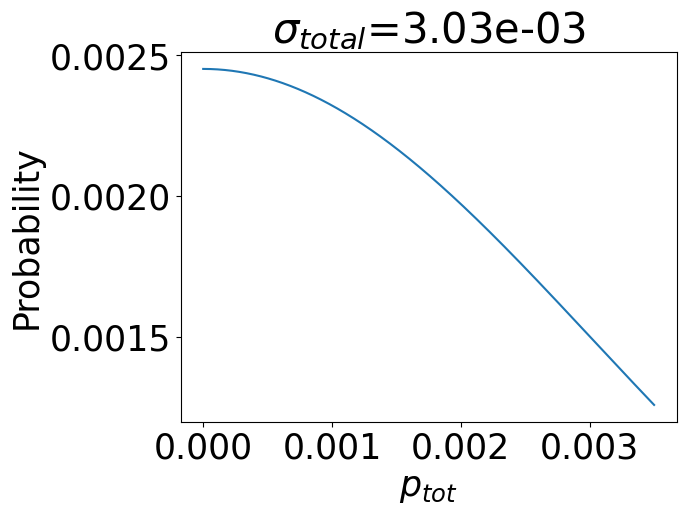

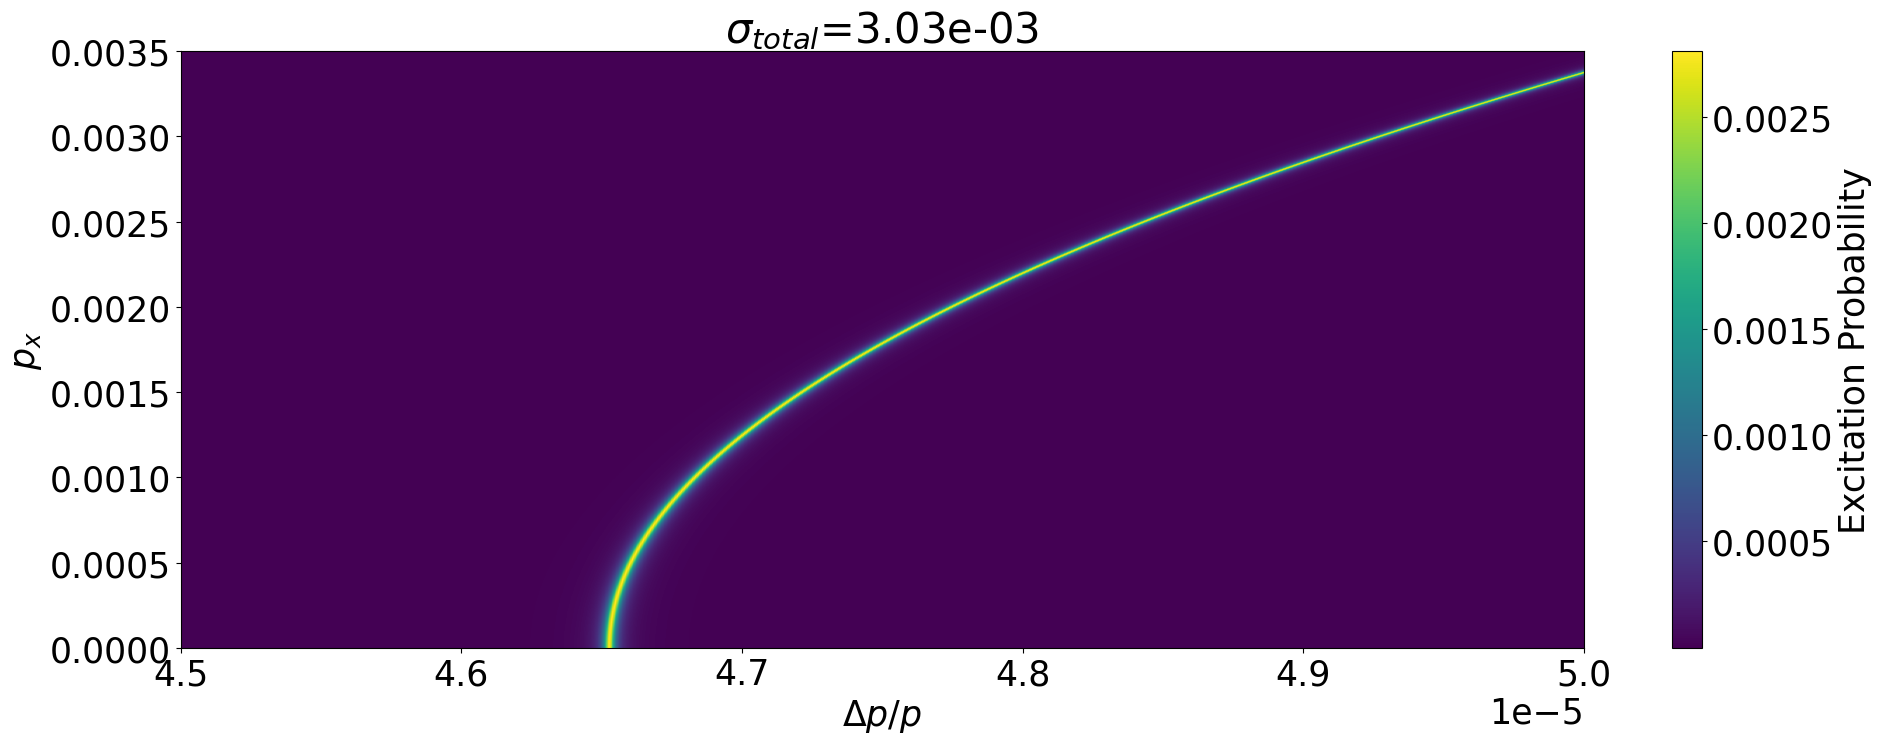

sigma_total: 3.03 mrad
half_width: 3.56 mrad


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import constants 
from tqdm import tqdm 

C_LIGHT = 2.99792458e8
hbar = 1.054571817e-34#; // J*sec
QELEM = 1.60217663e-19

#plot with dp/p instead of detuning

ion_excited_lifetime=2.44e-9
gamma_decay=1/ion_excited_lifetime
p0c=12400049491.415041
m0=14903905638.72
gamma0=1.3008551033839242
beta0=0.639579302749178


hc=constants.hbar*C_LIGHT/constants.e # eV*m (ħc)
lambda_0 = 103.76*1e-9 # m -- ion excitation wavelength
hw0 = 2*np.pi*hc/lambda_0 # m -- ion excitation wavelength

emittance_x=10*1e-6 #inital emittance
emittance_y=15*1e-6 #inital emittance

beta_x = 6
beta_y = 2
disp_x = 0

# num_particles = int(1e2)

# sigma_x = np.sqrt(beta_x*emittance_x)
sigma_px = np.sqrt(emittance_x*1/beta_x)
# sigma_y = np.sqrt(beta_y*emittance_y)
# sigma_py = np.sqrt(emittance_y*1/beta_y)


delta_fwhm = (np.sqrt(1 + K1) * laser_wavelength) / (2 * np.pi * (ion_excited_lifetime) * (1 + beta0) * beta0 * gamma0 * C_LIGHT)



# Define a grid of delta and px values
#delta_range = np.linspace(0.464e-4, 0.800e-4, 100)
delta_range = np.linspace(0.45e-4, 0.6e-4, 1000)
delta_range = np.linspace(0.45e-4, 0.5e-4, 1000)
px_range = np.linspace(0, 8e-3, 1000)
px_range = np.linspace(0, 3.5e-3, 1000)

# Create a 2D grid of delta and px values using meshgrid
delta_grid, px_grid = np.meshgrid(delta_range, px_range)

# Create an empty 2D grid for the excitation probability
excitation_prob_grid = np.zeros_like(delta_grid)

for i in tqdm(range(len(delta_range))):
    for j in range(len(px_range)):
        delta = delta_range[i]
        px = px_range[j]
        py=0

        pc = p0c*(1.0+delta)
        gamma = np.sqrt(1.0 + pc*pc/(m0*m0))
        beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))
        beta_x  = px*p0c/m0/gamma
        beta_y  = py*p0c/m0/gamma
        
        beta_z  = np.sqrt(beta*beta - beta_x*beta_x -beta_y*beta_y)

        vx  = C_LIGHT*beta_x
        vy  = C_LIGHT*beta_y
        vz  = C_LIGHT*beta_z

        nx=0
        ny=0
        nz=-1
        cos_theta=-(nx*vx + ny*vy + nz*vz)/(beta*C_LIGHT)
        theta_l=0


        laser_wavelength=2.21317529299723e-07
        # laser_wavelength=2.213116311631163e-07
        laser_wavelength=2.213116311631163e-07
        ion_excitation_energy=hw0

        pc = p0c*(1.0+delta)#; // eV
        gamma = np.sqrt(1.0 + pc*pc/(m0*m0))
        beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))

        laser_omega_ion_frame = (2.0*np.pi*C_LIGHT/laser_wavelength)*(1.0+beta*cos_theta)*gamma

        OmegaTransition = ion_excitation_energy*QELEM/hbar#; // rad/sec
        DeltaDetuning = (OmegaTransition - laser_omega_ion_frame)#/(2*gamma)

        ratio_ΔΓ_range = DeltaDetuning/gamma_decay

        # Calculate the heatmap values using the equation
        excitation_prob = 0.5*K1 / (4*ratio_ΔΓ_range*ratio_ΔΓ_range + K1 + 1)

        excitation_prob_grid[j, i] = excitation_prob
        #excitation_prob_grid[i, j] = excitation_prob

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm




# Calculate the Gaussian distribution using scipy.stats.norm.pdf
gaussian_distribution = norm.pdf(px_range, loc=0, scale=sigma_total)

# Normalize the distribution to get the total probability equal to 1
total_probability = np.sum(gaussian_distribution)
probability = 2*gaussian_distribution / total_probability

# Plot the Gaussian distribution with probability
plt.title('$\sigma_{total}$'f'={sigma_total:.2e}')
plt.plot(px_range, probability, label=f'Gaussian Distribution (σ={sigma_total})')
plt.xlabel(r"$p_{tot}$")
plt.ylabel('Probability')
plt.show()


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


plt.figure(figsize=(20, 8))
plt.title('$\sigma_{total}$'f'={sigma_total:.2e}')
plt.imshow(excitation_prob_grid, extent=[delta_range[0], delta_range[-1], px_range[0], px_range[-1]], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Excitation Probability')
plt.xlabel(r"$\Delta p / p$")
plt.ylabel(r"probability of $p_{x}$")
plt.ylabel(r"$p_{x}$")
# Use probability for the y-axis tick labels
# yticks = np.linspace(px_range[0], px_range[-1], len(probability))
# plt.yticks(yticks[::100], [f'{prob:.1e}' for prob in probability[::100]])
plt.tight_layout()
plt.show()


#Gaussian FWHM
fwhm = 2 * np.sqrt(2 * np.log(2)) * sigma_total
half_width = fwhm / 2


print(f'sigma_total: {sigma_total * 1e3:.2f} mrad')
print(f'half_width: {half_width * 1e3:.2f} mrad')



100%|██████████| 1000/1000 [00:07<00:00, 125.13it/s]


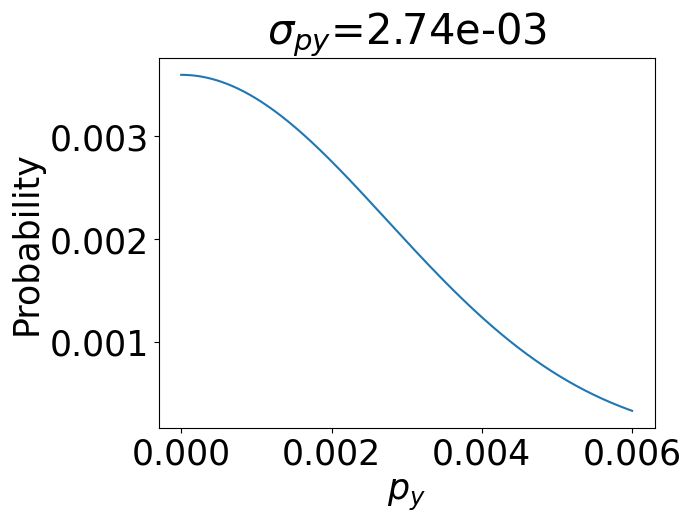

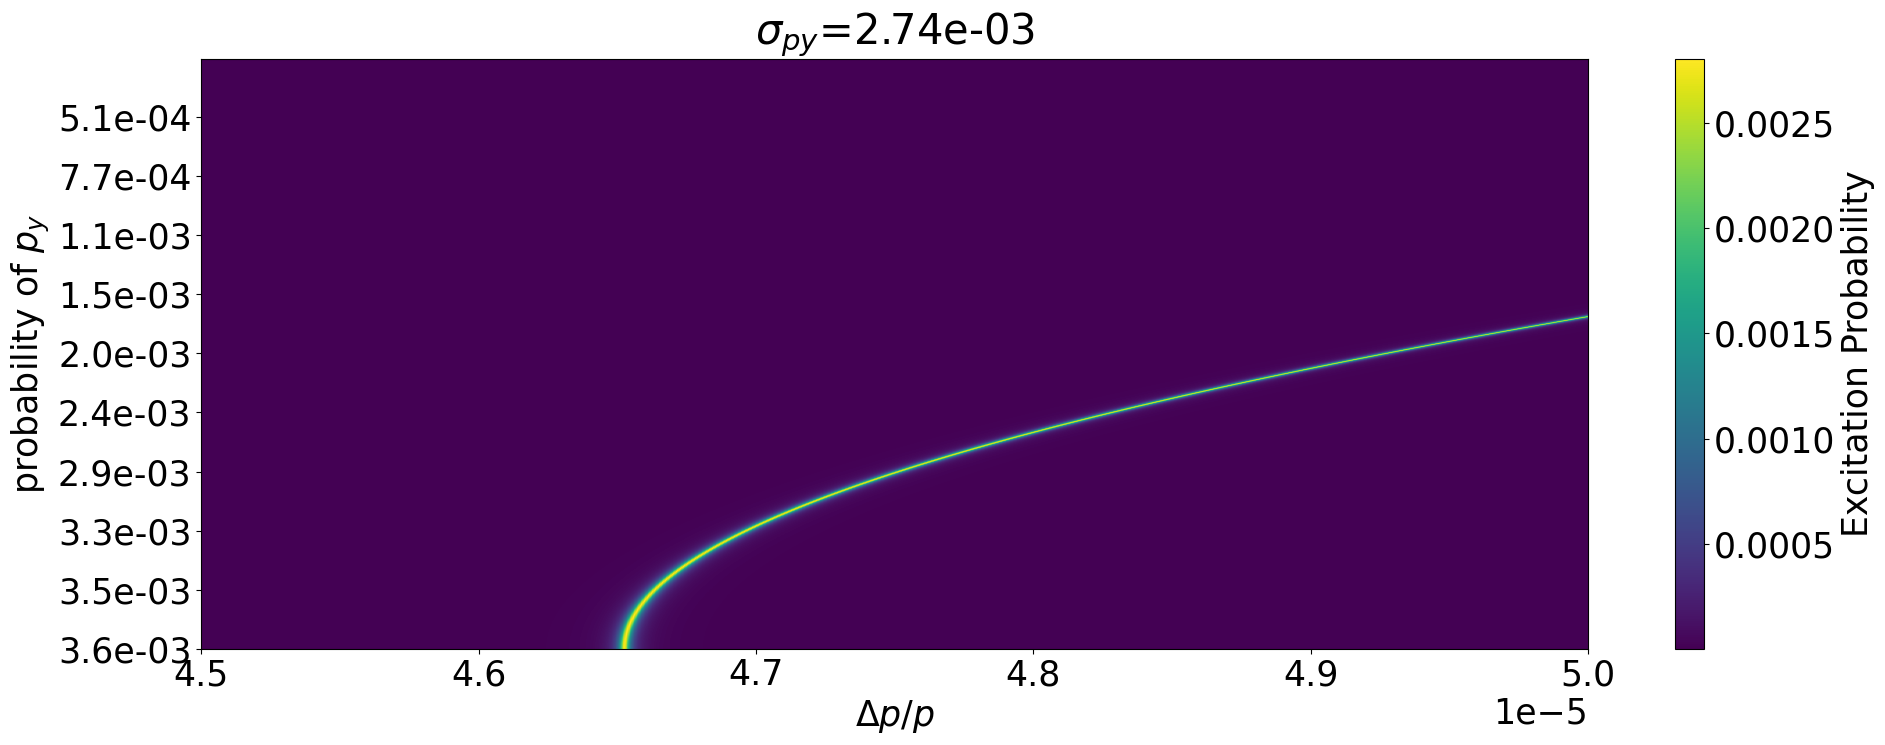

sigma_py: 2.74 mrad
half_width: 3.22 mrad


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import constants 
from tqdm import tqdm 

C_LIGHT = 2.99792458e8
hbar = 1.054571817e-34#; // J*sec
QELEM = 1.60217663e-19

#plot with dp/p instead of detuning

ion_excited_lifetime=2.44e-9
gamma_decay=1/ion_excited_lifetime
p0c=12400049491.415041
m0=14903905638.72
gamma0=1.3008551033839242
beta0=0.639579302749178


hc=constants.hbar*C_LIGHT/constants.e # eV*m (ħc)
lambda_0 = 103.76*1e-9 # m -- ion excitation wavelength
hw0 = 2*np.pi*hc/lambda_0 # m -- ion excitation wavelength

emittance_x=10*1e-6 #inital emittance
emittance_y=15*1e-6 #inital emittance

beta_x = 6
beta_y = 2
disp_x = 0

# num_particles = int(1e2)

# sigma_x = np.sqrt(beta_x*emittance_x)
sigma_px = np.sqrt(emittance_x*1/beta_x)
# sigma_y = np.sqrt(beta_y*emittance_y)
# sigma_py = np.sqrt(emittance_y*1/beta_y)


delta_fwhm = (np.sqrt(1 + K1) * laser_wavelength) / (2 * np.pi * (ion_excited_lifetime) * (1 + beta0) * beta0 * gamma0 * C_LIGHT)



# Define a grid of delta and px values
#delta_range = np.linspace(0.464e-4, 0.800e-4, 100)
delta_range = np.linspace(0.45e-4, 0.6e-4, 1000)
delta_range = np.linspace(0.45e-4, 0.5e-4, 1000)
px_range = np.linspace(0, 8e-3, 1000)
px_range = np.linspace(0, 6e-3, 1000)

# Create a 2D grid of delta and px values using meshgrid
delta_grid, px_grid = np.meshgrid(delta_range, px_range)

# Create an empty 2D grid for the excitation probability
excitation_prob_grid = np.zeros_like(delta_grid)

for i in tqdm(range(len(delta_range))):
    for j in range(len(px_range)):
        delta = delta_range[i]
        px = px_range[j]
        py=0

        pc = p0c*(1.0+delta)
        gamma = np.sqrt(1.0 + pc*pc/(m0*m0))
        beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))
        beta_x  = px*p0c/m0/gamma
        beta_y  = py*p0c/m0/gamma
        
        beta_z  = np.sqrt(beta*beta - beta_x*beta_x -beta_y*beta_y)

        vx  = C_LIGHT*beta_x
        vy  = C_LIGHT*beta_y
        vz  = C_LIGHT*beta_z

        nx=0
        ny=0
        nz=-1
        cos_theta=-(nx*vx + ny*vy + nz*vz)/(beta*C_LIGHT)
        theta_l=0


        laser_wavelength=2.21317529299723e-07
        # laser_wavelength=2.213116311631163e-07
        laser_wavelength=2.213116311631163e-07
        ion_excitation_energy=hw0

        pc = p0c*(1.0+delta)#; // eV
        gamma = np.sqrt(1.0 + pc*pc/(m0*m0))
        beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))

        laser_omega_ion_frame = (2.0*np.pi*C_LIGHT/laser_wavelength)*(1.0+beta*cos_theta)*gamma

        OmegaTransition = ion_excitation_energy*QELEM/hbar#; // rad/sec
        DeltaDetuning = (OmegaTransition - laser_omega_ion_frame)#/(2*gamma)

        ratio_ΔΓ_range = DeltaDetuning/gamma_decay

        # Calculate the heatmap values using the equation
        excitation_prob = 0.5*K1 / (4*ratio_ΔΓ_range*ratio_ΔΓ_range + K1 + 1)

        excitation_prob_grid[j, i] = excitation_prob
        #excitation_prob_grid[i, j] = excitation_prob

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm




# Calculate the Gaussian distribution using scipy.stats.norm.pdf
gaussian_distribution = norm.pdf(px_range, loc=0, scale=sigma_py)

# Normalize the distribution to get the total probability equal to 1
total_probability = np.sum(gaussian_distribution)
probability = 2*gaussian_distribution / total_probability

# Plot the Gaussian distribution with probability
plt.title('$\sigma_{py}$'f'={sigma_py:.2e}')
plt.plot(px_range, probability, label=f'Gaussian Distribution (σ={sigma_total})')
plt.xlabel(r"$p_{y}$")
plt.ylabel('Probability')
plt.show()


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


plt.figure(figsize=(20, 8))
plt.title('$\sigma_{py}$'f'={sigma_py:.2e}')
plt.imshow(excitation_prob_grid, extent=[delta_range[0], delta_range[-1], px_range[0], px_range[-1]], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Excitation Probability')
plt.xlabel(r"$\Delta p / p$")
plt.ylabel(r"probability of $p_{y}$")
#plt.ylabel(r"$p_{y}$")
# Use probability for the y-axis tick labels
yticks = np.linspace(px_range[0], px_range[-1], len(probability))
plt.yticks(yticks[::100], [f'{prob:.1e}' for prob in probability[::100]])
plt.tight_layout()
plt.show()


#Gaussian FWHM
fwhm = 2 * np.sqrt(2 * np.log(2)) * sigma_py
half_width = fwhm / 2


print(f'sigma_py: {sigma_py * 1e3:.2f} mrad')
print(f'half_width: {half_width * 1e3:.2f} mrad')



100%|██████████| 1000/1000 [00:07<00:00, 132.94it/s]


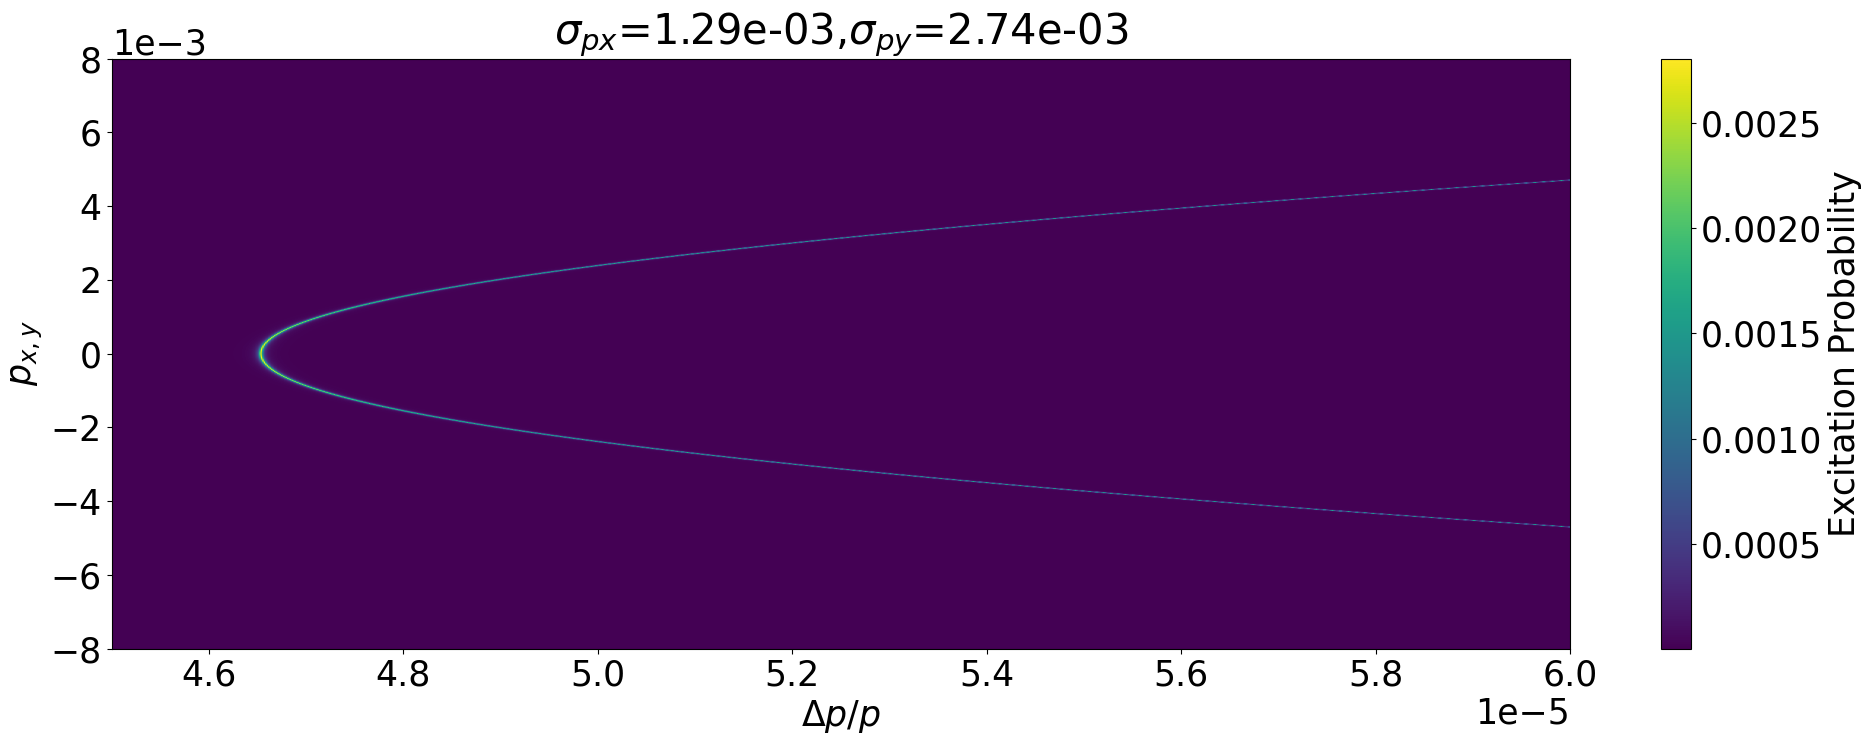

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import constants 
from tqdm import tqdm 

C_LIGHT = 2.99792458e8
hbar = 1.054571817e-34#; // J*sec
QELEM = 1.60217663e-19

#plot with dp/p instead of detuning

ion_excited_lifetime=2.44e-9
gamma_decay=1/ion_excited_lifetime
p0c=12400049491.415041
m0=14903905638.72
gamma0=1.3008551033839242
beta0=0.639579302749178


hc=constants.hbar*C_LIGHT/constants.e # eV*m (ħc)
lambda_0 = 103.76*1e-9 # m -- ion excitation wavelength
hw0 = 2*np.pi*hc/lambda_0 # m -- ion excitation wavelength

emittance_x=10*1e-6 #inital emittance
emittance_y=15*1e-6 #inital emittance

beta_x = 6
beta_y = 2
disp_x = 0

# num_particles = int(1e2)

# sigma_x = np.sqrt(beta_x*emittance_x)
sigma_px = np.sqrt(emittance_x*1/beta_x)
# sigma_y = np.sqrt(beta_y*emittance_y)
sigma_py = np.sqrt(emittance_y*1/beta_y)
# sigma_p = 2e-5 # relative ion momentum spread
# sigma_p = 2e-4 # relative ion momentum spread

# delta = np.random.uniform(low=0.4e-4, high=0.6e-4, size=num_particles)

# delta = np.random.uniform(low=0e-4, high=1e-4, size=num_particles)

# # delta = np.random.normal(loc=0, scale=sigma_p, size=num_particles)
# x = np.random.normal(loc=0.0, scale=sigma_x, size=num_particles) + disp_x * delta
# px = np.random.normal(loc=0.0, scale=sigma_px, size=num_particles)
# y = np.random.normal(loc=0.0, scale=sigma_y, size=num_particles)
# py = np.random.normal(loc=0.0, scale=sigma_py, size=num_particles)



# delta_range=np.linspace(4.6e-05,4.7e-5,int(1e6))
# delta_range=np.linspace(4.2e-05,5e-5,int(1e6))


delta_fwhm = (np.sqrt(1 + K1) * laser_wavelength) / (2 * np.pi * (ion_excited_lifetime) * (1 + beta0) * beta0 * gamma0 * C_LIGHT)



# Define a grid of delta and px values
#delta_range = np.linspace(0.464e-4, 0.800e-4, 100)
delta_range = np.linspace(0.45e-4, 0.6e-4, 1000)
px_range = np.linspace(-8e-3, 8e-3, 1000)

# Create a 2D grid of delta and px values using meshgrid
delta_grid, px_grid = np.meshgrid(delta_range, px_range)

# Create an empty 2D grid for the excitation probability
excitation_prob_grid = np.zeros_like(delta_grid)

for i in tqdm(range(len(delta_range))):
    for j in range(len(px_range)):
        delta = delta_range[i]
        px = px_range[j]
        py=0

        pc = p0c*(1.0+delta)
        gamma = np.sqrt(1.0 + pc*pc/(m0*m0))
        beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))
        beta_x  = px*p0c/m0/gamma
        beta_y  = py*p0c/m0/gamma
        beta_y=beta_x

        beta_z  = np.sqrt(beta*beta - beta_x*beta_x -beta_y*beta_y)

        vx  = C_LIGHT*beta_x
        vy  = C_LIGHT*beta_y
        vz  = C_LIGHT*beta_z

        nx=0
        ny=0
        nz=-1
        cos_theta=-(nx*vx + ny*vy + nz*vz)/(beta*C_LIGHT)
        theta_l=0


        laser_wavelength=2.21317529299723e-07
        # laser_wavelength=2.213116311631163e-07
        laser_wavelength=2.213116311631163e-07
        ion_excitation_energy=hw0

        pc = p0c*(1.0+delta)#; // eV
        gamma = np.sqrt(1.0 + pc*pc/(m0*m0))
        beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))

        laser_omega_ion_frame = (2.0*np.pi*C_LIGHT/laser_wavelength)*(1.0+beta*cos_theta)*gamma

        OmegaTransition = ion_excitation_energy*QELEM/hbar#; // rad/sec
        DeltaDetuning = (OmegaTransition - laser_omega_ion_frame)#/(2*gamma)

        ratio_ΔΓ_range = DeltaDetuning/gamma_decay

        # Calculate the heatmap values using the equation
        excitation_prob = 0.5*K1 / (4*ratio_ΔΓ_range*ratio_ΔΓ_range + K1 + 1)

        excitation_prob_grid[j, i] = excitation_prob
        #excitation_prob_grid[i, j] = excitation_prob
        


slope=7080583.968682445


        
plt.figure(figsize=(20, 8))
plt.title('$\sigma_{px}$'f'={sigma_px:.2e}' ',$\sigma_{py}$'f'={sigma_py:.2e}')
plt.imshow(excitation_prob_grid, extent=[delta_range[0], delta_range[-1], px_range[0], px_range[-1]], origin='lower', cmap='viridis', aspect='auto')
#plt.scatter(px_range,cos_theta)
plt.colorbar(label='Excitation Probability')
plt.xlabel(r"$\Delta p / p$")
plt.ylabel(r"$p_{x,y}$")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tight_layout()
# plt.savefig('transverse_momentum_linewidth(x+y).eps', format='eps', dpi=300)
plt.savefig('transverse_momentum_linewidth(x+y).png', format='png', dpi=300)
plt.show()


100%|██████████| 1000/1000 [00:07<00:00, 131.16it/s]


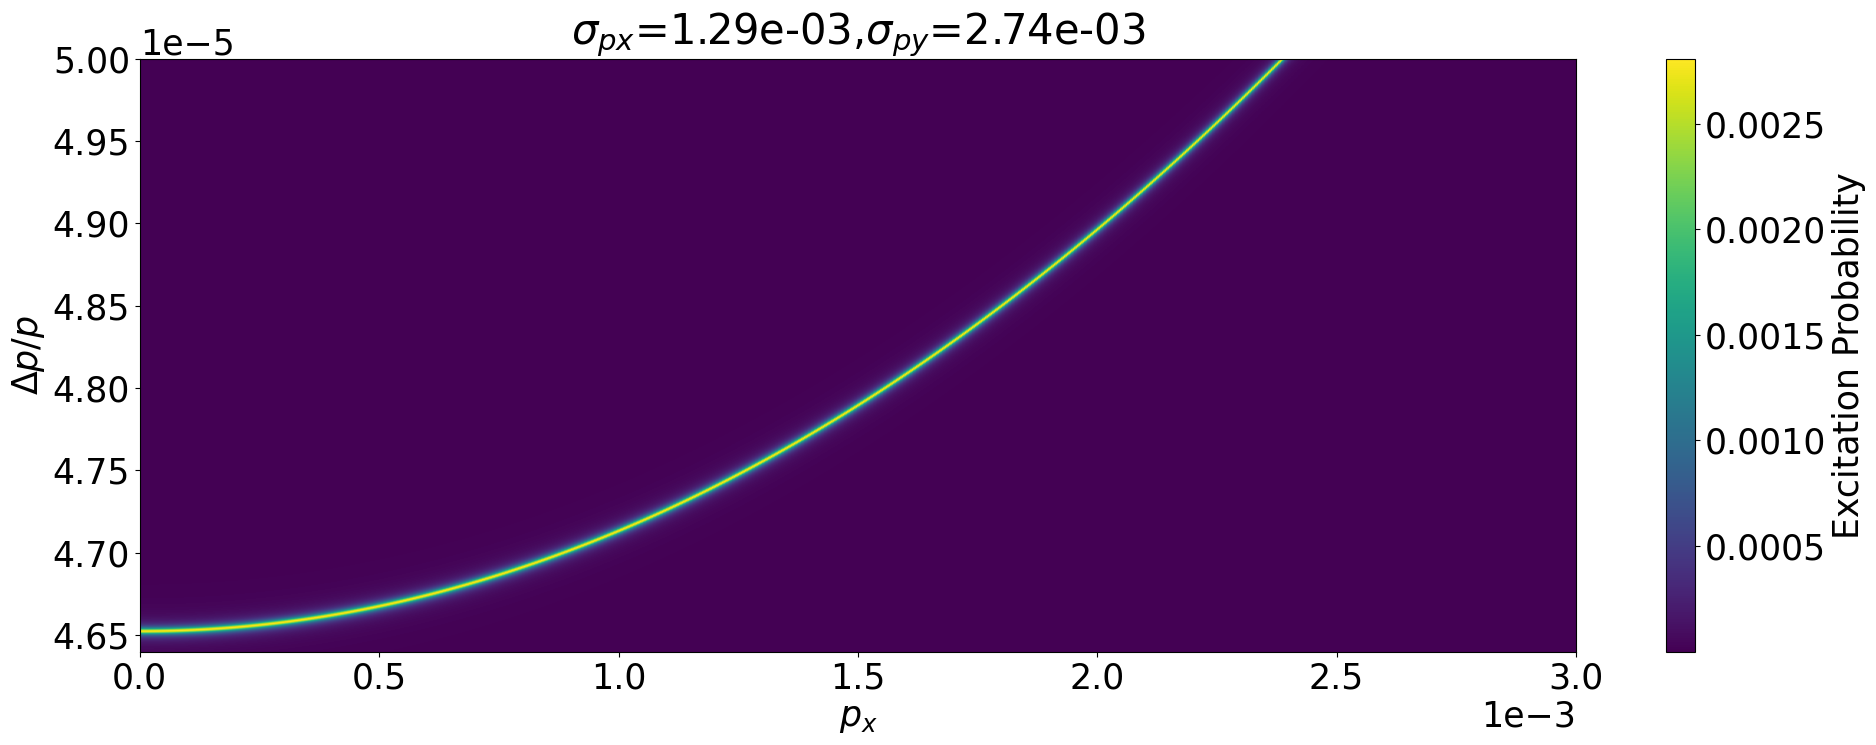

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import constants 
from tqdm import tqdm 

C_LIGHT = 2.99792458e8
hbar = 1.054571817e-34#; // J*sec
QELEM = 1.60217663e-19

#plot with dp/p instead of detuning

ion_excited_lifetime=2.44e-9
gamma_decay=1/ion_excited_lifetime
p0c=12400049491.415041
m0=14903905638.72
gamma0=1.3008551033839242
beta0=0.639579302749178


hc=constants.hbar*C_LIGHT/constants.e # eV*m (ħc)
lambda_0 = 103.76*1e-9 # m -- ion excitation wavelength
hw0 = 2*np.pi*hc/lambda_0 # m -- ion excitation wavelength

emittance_x=10*1e-6 #inital emittance
emittance_y=15*1e-6 #inital emittance

beta_x = 6
beta_y = 2
disp_x = 0

# num_particles = int(1e2)

# sigma_x = np.sqrt(beta_x*emittance_x)
sigma_px = np.sqrt(emittance_x*1/beta_x)
# sigma_y = np.sqrt(beta_y*emittance_y)
sigma_py = np.sqrt(emittance_y*1/beta_y)
# sigma_p = 2e-5 # relative ion momentum spread
# sigma_p = 2e-4 # relative ion momentum spread

# delta = np.random.uniform(low=0.4e-4, high=0.6e-4, size=num_particles)

# delta = np.random.uniform(low=0e-4, high=1e-4, size=num_particles)

# # delta = np.random.normal(loc=0, scale=sigma_p, size=num_particles)
# x = np.random.normal(loc=0.0, scale=sigma_x, size=num_particles) + disp_x * delta
# px = np.random.normal(loc=0.0, scale=sigma_px, size=num_particles)
# y = np.random.normal(loc=0.0, scale=sigma_y, size=num_particles)
# py = np.random.normal(loc=0.0, scale=sigma_py, size=num_particles)



# delta_range=np.linspace(4.6e-05,4.7e-5,int(1e6))
# delta_range=np.linspace(4.2e-05,5e-5,int(1e6))


delta_fwhm = (np.sqrt(1 + K1) * laser_wavelength) / (2 * np.pi * (ion_excited_lifetime) * (1 + beta0) * beta0 * gamma0 * C_LIGHT)



# Define a grid of delta and px values
delta_range = np.linspace(0.464e-4, 0.500e-4, 1000)
# delta_range = np.linspace(0e-4, 0.5e-4, 1000)
px_range = np.linspace(0, 3e-3, 1000)

# Create a 2D grid of delta and px values using meshgrid
delta_grid, px_grid = np.meshgrid(delta_range, px_range)

# Create an empty 2D grid for the excitation probability
excitation_prob_grid = np.zeros_like(delta_grid)

for i in tqdm(range(len(delta_range))):
    for j in range(len(px_range)):
        delta = delta_range[i]
        px = px_range[j]
        py=0

        pc = p0c*(1.0+delta)
        gamma = np.sqrt(1.0 + pc*pc/(m0*m0))
        beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))
        beta_x  = px*p0c/m0/gamma
        beta_y  = py*p0c/m0/gamma
        beta_y=beta_x

        beta_z  = np.sqrt(beta*beta - beta_x*beta_x -beta_y*beta_y)

        vx  = C_LIGHT*beta_x
        vy  = C_LIGHT*beta_y
        vz  = C_LIGHT*beta_z

        nx=0
        ny=0
        nz=-1
        cos_theta=-(nx*vx + ny*vy + nz*vz)/(beta*C_LIGHT)
        theta_l=0


        laser_wavelength=2.21317529299723e-07
        # laser_wavelength=2.213116311631163e-07
        laser_wavelength=2.213116311631163e-07
        ion_excitation_energy=hw0

        pc = p0c*(1.0+delta)#; // eV
        gamma = np.sqrt(1.0 + pc*pc/(m0*m0))
        beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))

        laser_omega_ion_frame = (2.0*np.pi*C_LIGHT/laser_wavelength)*(1.0+beta*cos_theta)*gamma

        OmegaTransition = ion_excitation_energy*QELEM/hbar#; // rad/sec
        DeltaDetuning = (OmegaTransition - laser_omega_ion_frame)#/(2*gamma)

        ratio_ΔΓ_range = DeltaDetuning/gamma_decay

        # Calculate the heatmap values using the equation
        excitation_prob = 0.5*K1 / (4*ratio_ΔΓ_range*ratio_ΔΓ_range + K1 + 1)

        #excitation_prob_grid[j, i] = excitation_prob
        excitation_prob_grid[i, j] = excitation_prob
        
      



        
plt.figure(figsize=(20, 8))
plt.title('$\sigma_{px}$' f'={sigma_px:.2e}' ',$\sigma_{py}$' f'={sigma_py:.2e}')
plt.imshow(excitation_prob_grid, extent=[px_range[0], px_range[-1], delta_range[0], delta_range[-1]], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Excitation Probability')
plt.xlabel(r"$p_{x}$")
plt.ylabel(r"$\Delta p / p$")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.tight_layout()
# plt.savefig('transverse_momentum_linewidth(x+y).eps', format='eps', dpi=300)
# plt.savefig('transverse_momentum_linewidth(x+y).png', format='png', dpi=300)
# plt.savefig('transverse_momentum_linewidth.eps', format='eps', dpi=300)
# plt.savefig('transverse_momentum_linewidth.png', format='png', dpi=300)
plt.show()


In [23]:
for i in range(100):
    #print(i)
    true1=i % 10 ==0
    print(true1)

True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
